$$
\begin{align}
p(\bar{Z}, & \bar{J}, \bar{\theta}, \bar{\psi})\\
\bar{Z} &= \mathrm{abundances}\\
\bar{J}, \bar{\theta} &= \mathrm{actions}, \mathrm{angles}\\
\bar{\psi} &= \mathrm{stellar~evolutionary~phase}, \mathrm{birth~date}, ...
\end{align}
$$

"The chemo-dynamical structure of the Milky Way" - in principle, encodes everything about Milky Way history, stellar evolution, star formation, etc...yikes.

If you assume steady-state and that stars preserve their birth abundances,
$$
p(\bar{Z}, \bar{J}, \bar{\theta}, \bar{\psi}) = p(\bar{Z}, \bar{J}) \, \frac{1}{(2\pi)^3} \, ...
$$

Sanders et al. (and other) extended distribution functions:
$$
p(\bar{Z}, \bar{J})
$$

Bovy et al. mono-abundance populations: 
$$
p(\bar{J}\,|\,\bar{Z})
$$

Ness et al. 
$$
p(\bar{Z}\,|\,\bar{J})
$$

Standard steady-state / Jeans modeling:
$$
p(\bar{J})
$$

Chemical evolution models
$$
p(\bar{Z})
$$

In [2]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [4]:
t1 = at.Table.read('/Users/apricewhelan/data/APOGEE_beta/apogee_astroNN-r13-l33-58932beta.fits')
t1 = t1[(t1['weighted_dist'] > 0) & (t1['weighted_dist'] < 100000)]

t2 = at.Table.read('/Users/apricewhelan/data/APOGEE_beta/allStar-r13-l33-58932beta.fits')
t2 = t2[(t2['ASPCAPFLAG'] == 0) & (t2['LOGG'] > 1)]

keep_cols = ['APSTAR_ID', 'APOGEE_ID', 'TELESCOPE', 'LOCATION_ID', 'FIELD', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 
             'RA', 'DEC', 'GLON', 'GLAT', 'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE_TARGET3', 'APOGEE2_TARGET1', 
             'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'TARGFLAGS', 'SURVEY', 'PROGRAMNAME', 'NVISITS', 
             'SNR', 'STARFLAG', 'STARFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR', 'VERR_MED', 'OBSVHELIO_AVG', 
             'OBSVSCATTER', 'OBSVERR', 'OBSVERR_MED', 'PARAM', 'FPARAM', 'PARAM_COV', 'FPARAM_COV', 
             'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'VMICRO', 'VMACRO', 'VSINI', 
             'M_H', 'M_H_ERR', 'ALPHA_M', 'ALPHA_M_ERR', 'ASPCAPFLAG', 'ASPCAPFLAGS', 'PARAMFLAG', 
             'FELEM', 'FELEM_ERR', 'X_H', 'X_H_ERR', 'X_M', 'X_M_ERR', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 
             'MG_FE', 'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE', 
             'MN_FE', 'FE_H', 'CO_FE', 'NI_FE', 'CU_FE', 'GE_FE', 'RB_FE', 'CE_FE', 'ND_FE', 'YB_FE']
t2 = t2[keep_cols]

t = at.join(t2, t1, keys='APOGEE_ID', 
            uniq_col_name='{col_name}{table_name}',
            table_names=['', '_bovy'],)
c = coord.SkyCoord(t['RA']*u.deg, t['DEC']*u.deg,
                   distance=t['weighted_dist']*u.pc)

UnitConversionError: 'pc' (length) and 'deg' (angle) are not convertible

In [6]:
dwarfs = at.Table.read('/Users/apricewhelan/data/Misc/MW_dwarfs_globs.fits')
dwarfs = dwarfs[coord.Distance(distmod=dwarfs['DM']) < 70*u.kpc]
dwarfs_c = coord.SkyCoord(dwarfs['ra']*u.deg, dwarfs['dec']*u.deg,
                          distance=coord.Distance(distmod=dwarfs['DM']))

In [9]:
dwarf_sizes = (dwarfs['r_h']*u.arcmin * dwarfs_c.distance).to(u.pc, u.dimensionless_angles())
dwarf_sizes

<Quantity [2616.6896901 ,   44.04304809,   18.84038969,   29.32100106,
             31.9762478 ,   16.5378755 ,   34.2602655 ,  147.17908542,
             50.93020305,   34.29296484,   25.43630086,   76.1863851 ,
            127.28215202, 1360.45031515,   92.44371023, 1471.23715986,
             16.05928174,  164.54308479,   38.97230681, 1860.72711183,
            243.27454128,   18.529381  ,   47.86616328,   59.44701091,
             91.35785489,   30.32196799,   52.35987756,   20.71124046,
             30.01966313,   26.26720524,   28.44886681,    6.45771823,
             23.73647783,   35.19747325,   30.01966313,   18.84955592,
             22.92199084,   33.51032164,    9.42477796,   28.50704445,
             22.45656971,   20.24581932,   18.50049007,   23.96918839,
             19.19862177,   52.06898935,   30.36872898,   60.5047474 ,
             59.34119457,   20.42035225,   37.23369071,   21.99114858,
             30.54326191,   32.81218994,   37.35004599,   40.49163865,
      

In [71]:
dwarfs_mask = np.ones(len(c), dtype=bool)
for i, dc in enumerate(dwarfs_c):
    dthresh = np.sqrt((5 * dwarf_sizes[i])**2 + (3*t['dist_error']*u.pc)**2)
    dwarfs_mask &= ((c.separation(dc) > (8 * dwarfs['r_h'][i]*u.arcmin)) | 
                    ((c.separation(dc) < (8 * dwarfs['r_h'][i]*u.arcmin)) & 
                     (np.abs(c.distance - dwarfs_c.distance[i]) > dthresh)))
    
    
# Define the inverse masks:
all_dwarfs_masks = {}
for i, dc in enumerate(dwarfs_c):
    dthresh = np.sqrt((3 * dwarf_sizes[i])**2 + (3 * t['dist_error']*u.pc)**2)
    tmp = (
        (c.separation(dc) < (5 * dwarfs['r_h'][i]*u.arcmin)) & 
        (np.abs(c.distance - dwarfs_c.distance[i]) < dthresh))
    
    if tmp.sum() > 10:
        all_dwarfs_masks[dwarfs['name'][i]] = tmp

len(dwarfs_mask) - dwarfs_mask.sum()

8300

In [77]:
for k, mask in all_dwarfs_masks.items():
    if mask.sum() > 50:
        print(k, mask.sum())

SagittariusdSph 673
LMC 81
NGC 104 (47 Tuc) 345
NGC 2808 74
NGC 3201 296
NGC 5139 (omega Cen) 375
NGC 5272 (M 3) 432
NGC 5904 (M 5) 238
NGC 6121 (M 4) 394
NGC 6171 (M 107) 53
NGC 6205 (M 13) 95
NGC 6218 (M 12) 159
NGC 6254 (M 10) 165
NGC 6397 175
ESO 456-38 (Djorg 2) 62
NGC 6522 96
NGC 6528 57
NGC 6544 152
NGC 6656 (M 22) 692
NGC 6752 170
NGC 6809 (M 55) 122
NGC 6838 (M 71) 97
NGC 7078 (M 15) 69


In [73]:
# plt.hist(t[t['FIELD'] == 'M22']['weighted_dist'] / 1e3, bins=np.linspace(0, 10, 64));
# plt.hist(t[dwarfs_mask][t[dwarfs_mask]['FIELD'] == 'M22']['weighted_dist'] / 1e3, bins=np.linspace(0, 10, 64));

In [64]:
d_mask = np.sqrt(t['galr']**2 + t['galz']**2) < 50.

tt = t[d_mask]
tt_dwarfs_mask = dwarfs_mask[d_mask]

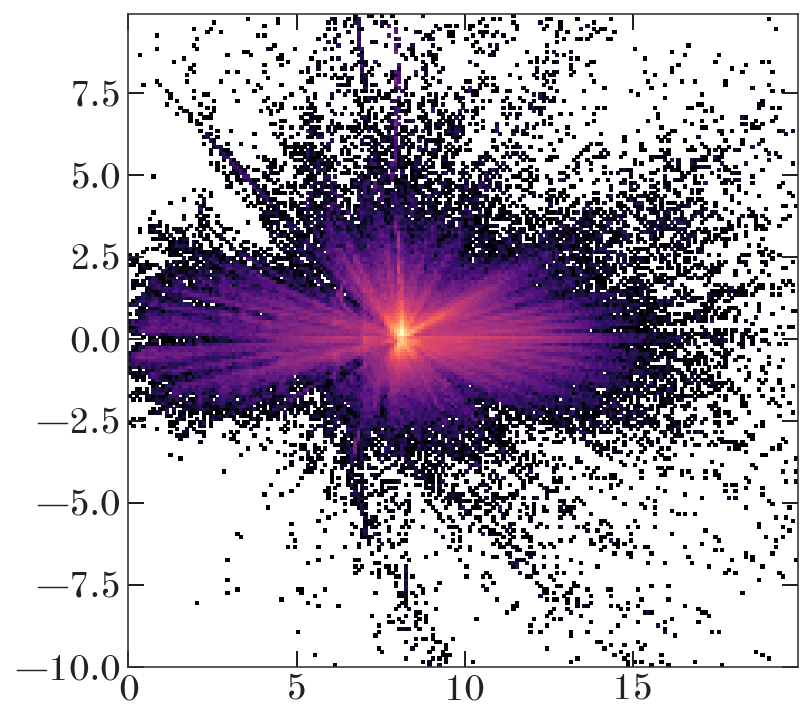

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist2d(tt['galr'], tt['galz'],
          bins=(np.arange(0, 20, 0.1),
                np.arange(-10, 10, 0.1)),
          norm=mpl.colors.LogNorm());

In [145]:
def make_panels(x, y, xbins, ybins, xlabel, ylabel,
                abun1='M_H', abun2='ALPHA_M',
                abun1_label=None, abun2_label=None,
                extra_mask=None, bins=None):
    
    if abun1 == 'M_H' and abun1_label is None:
        abun1_label = '$[M/H]$'
    elif abun1_label is None and isinstance(abun1, str):
        nu, de = abun1.split('_')
        abun1_label = f'[{nu.capitalize()}/{de.capitalize()}]'
        
    if abun2 == 'ALPHA_M' and abun2_label is None:
        abun2_label = r'$[\alpha/M]$'
    elif abun2_label is None and isinstance(abun2, str):
        nu, de = abun2.split('_')
        abun2_label = f'[{nu.capitalize()}/{de.capitalize()}]'
    
    if isinstance(abun1, str):
        abun1 = tt[abun1] 
    if isinstance(abun2, str):
        abun2 = tt[abun2]
        
    if bins is None:
        bins = (np.arange(-2.5, 0.75, 0.02),
                np.arange(-0.2, 0.5, 0.01))
        
    xlim = (bins[0].min(), bins[0].max())
    ylim = (bins[1].min(), bins[1].max())
    
    fig, axes = plt.subplots(len(ybins), len(xbins), 
                             figsize=(4 * len(xbins), 
                                      4 * len(ybins) * 0.75),
                             sharex=True, sharey=True,
                             constrained_layout=True)

    for i in range(len(ybins)):
        for j in range(len(xbins)):
            ax = axes[i, j]

            mask = ((x > xbins[j][0]) & (x < xbins[j][1]) & 
                    (y > ybins[i][0]) & (y < ybins[i][1]))
            
            if extra_mask is not None:
                mask &= extra_mask

            ax.hist2d(abun1[mask], abun2[mask],
                      bins=bins, norm=mpl.colors.LogNorm(), 
                      cmap='cividis')
            
            l, r = ybins[i]
            ax.text(xlim[1]-0.05, ylim[1]-0.05, f'${l:.1f} < {ylabel} < {r:.1f}$', 
                    ha='right', va='top', fontsize=18,
                    bbox=dict(facecolor='w', alpha=0.6))

            l, r = xbins[j]
            ax.text(xlim[0]+0.05, ylim[0]+0.05, f'${l:.1f} < {xlabel} < {r:.1f}$', 
                    ha='left', va='bottom', fontsize=18,
                    bbox=dict(facecolor='w', alpha=0.6))

    axes[-1, 0].set_xlabel(abun1_label, fontsize=26)
    axes[-1, 0].set_ylabel(abun2_label, fontsize=26)
    
    axes[0, 0].set_xlim(xlim)
    axes[0, 0].set_ylim(ylim)

    fig.set_facecolor('w')
    
    return fig, axes

In [146]:
def edges_to_bins(edges):
    return np.stack((edges[:-1], edges[1:])).T

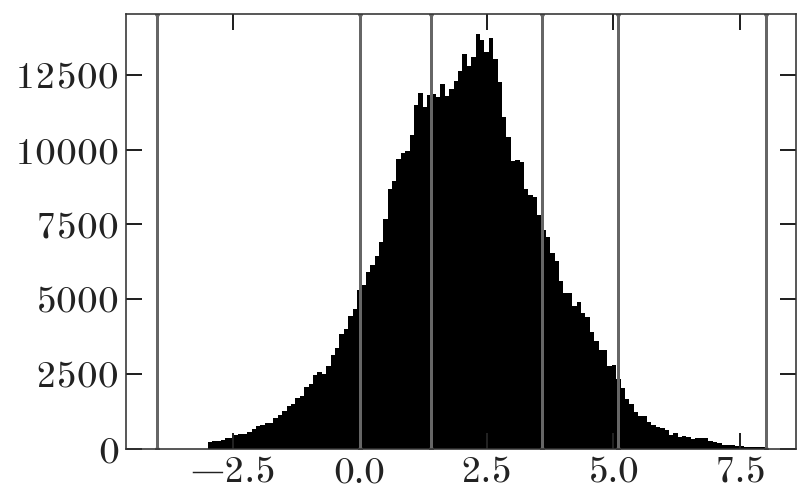

In [118]:
plt.hist(np.log(tt['jz']), bins=np.linspace(-3, 8, 128));

Jz_edges = [-4, 0, 1.4, 3.6, 5.1, 8] # np.linspace(-3, 8, 5+1)
# Jz_edges = np.linspace(-3, 8, 5+1)
for l in Jz_edges:
    plt.axvline(l)
    
logjz_bins = edges_to_bins(Jz_edges)[::-1]
logjz = np.log(tt['jz'])

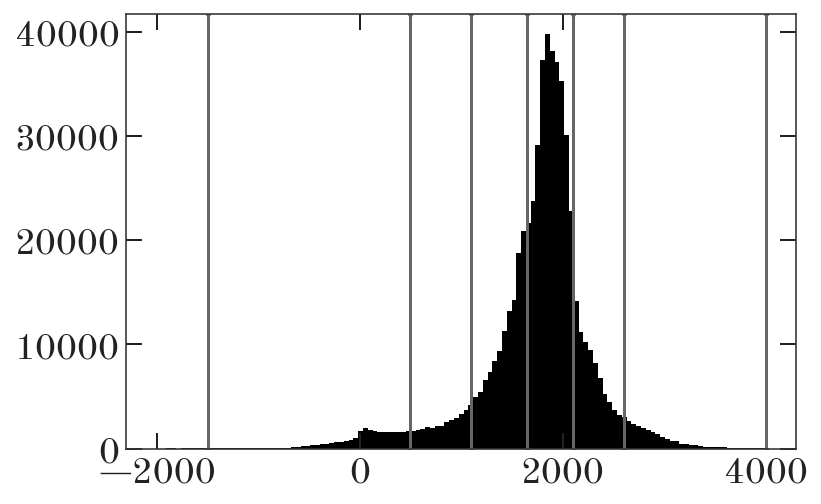

In [125]:
plt.hist(tt['Lz'], bins=np.linspace(-2000, 4000, 128));

Jphi_edges = [-1500, 500, 1100, 1650, 2100, 2600, 4000]
for l in Jphi_edges:
    plt.axvline(l)
    
jphi_bins = edges_to_bins(Jphi_edges) / 1e3
jphi = tt['Lz'] / 1e3

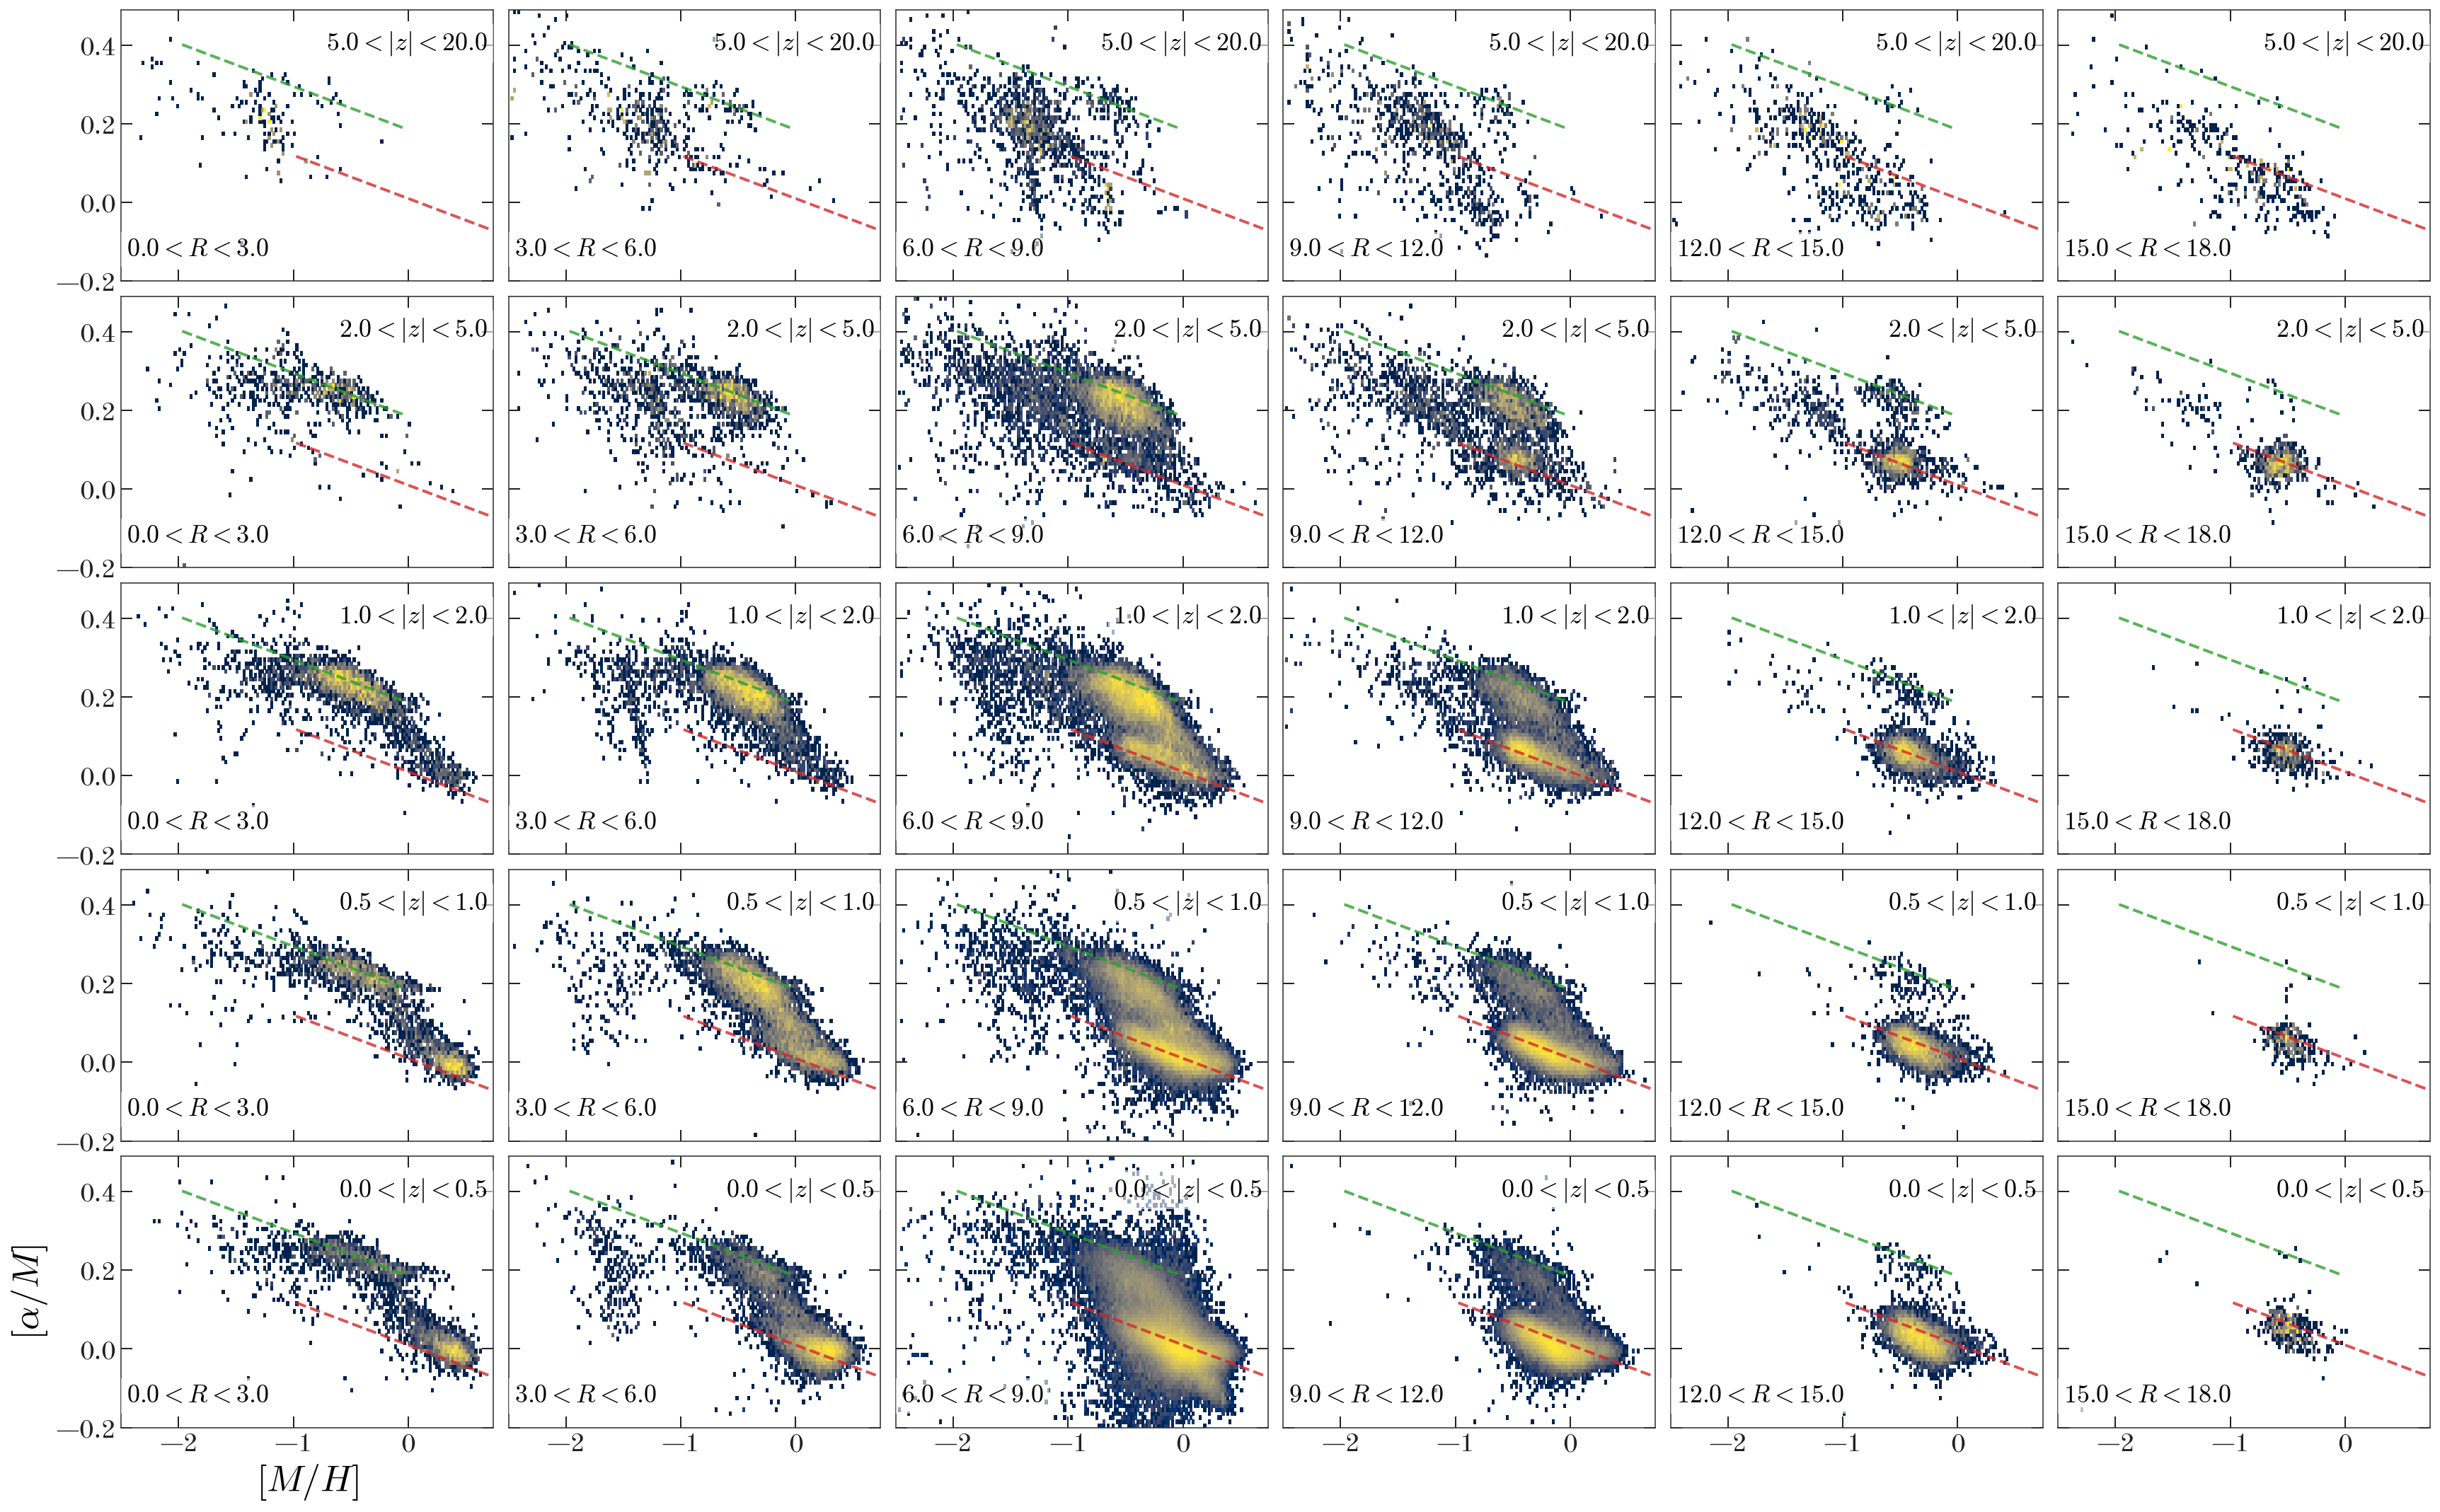

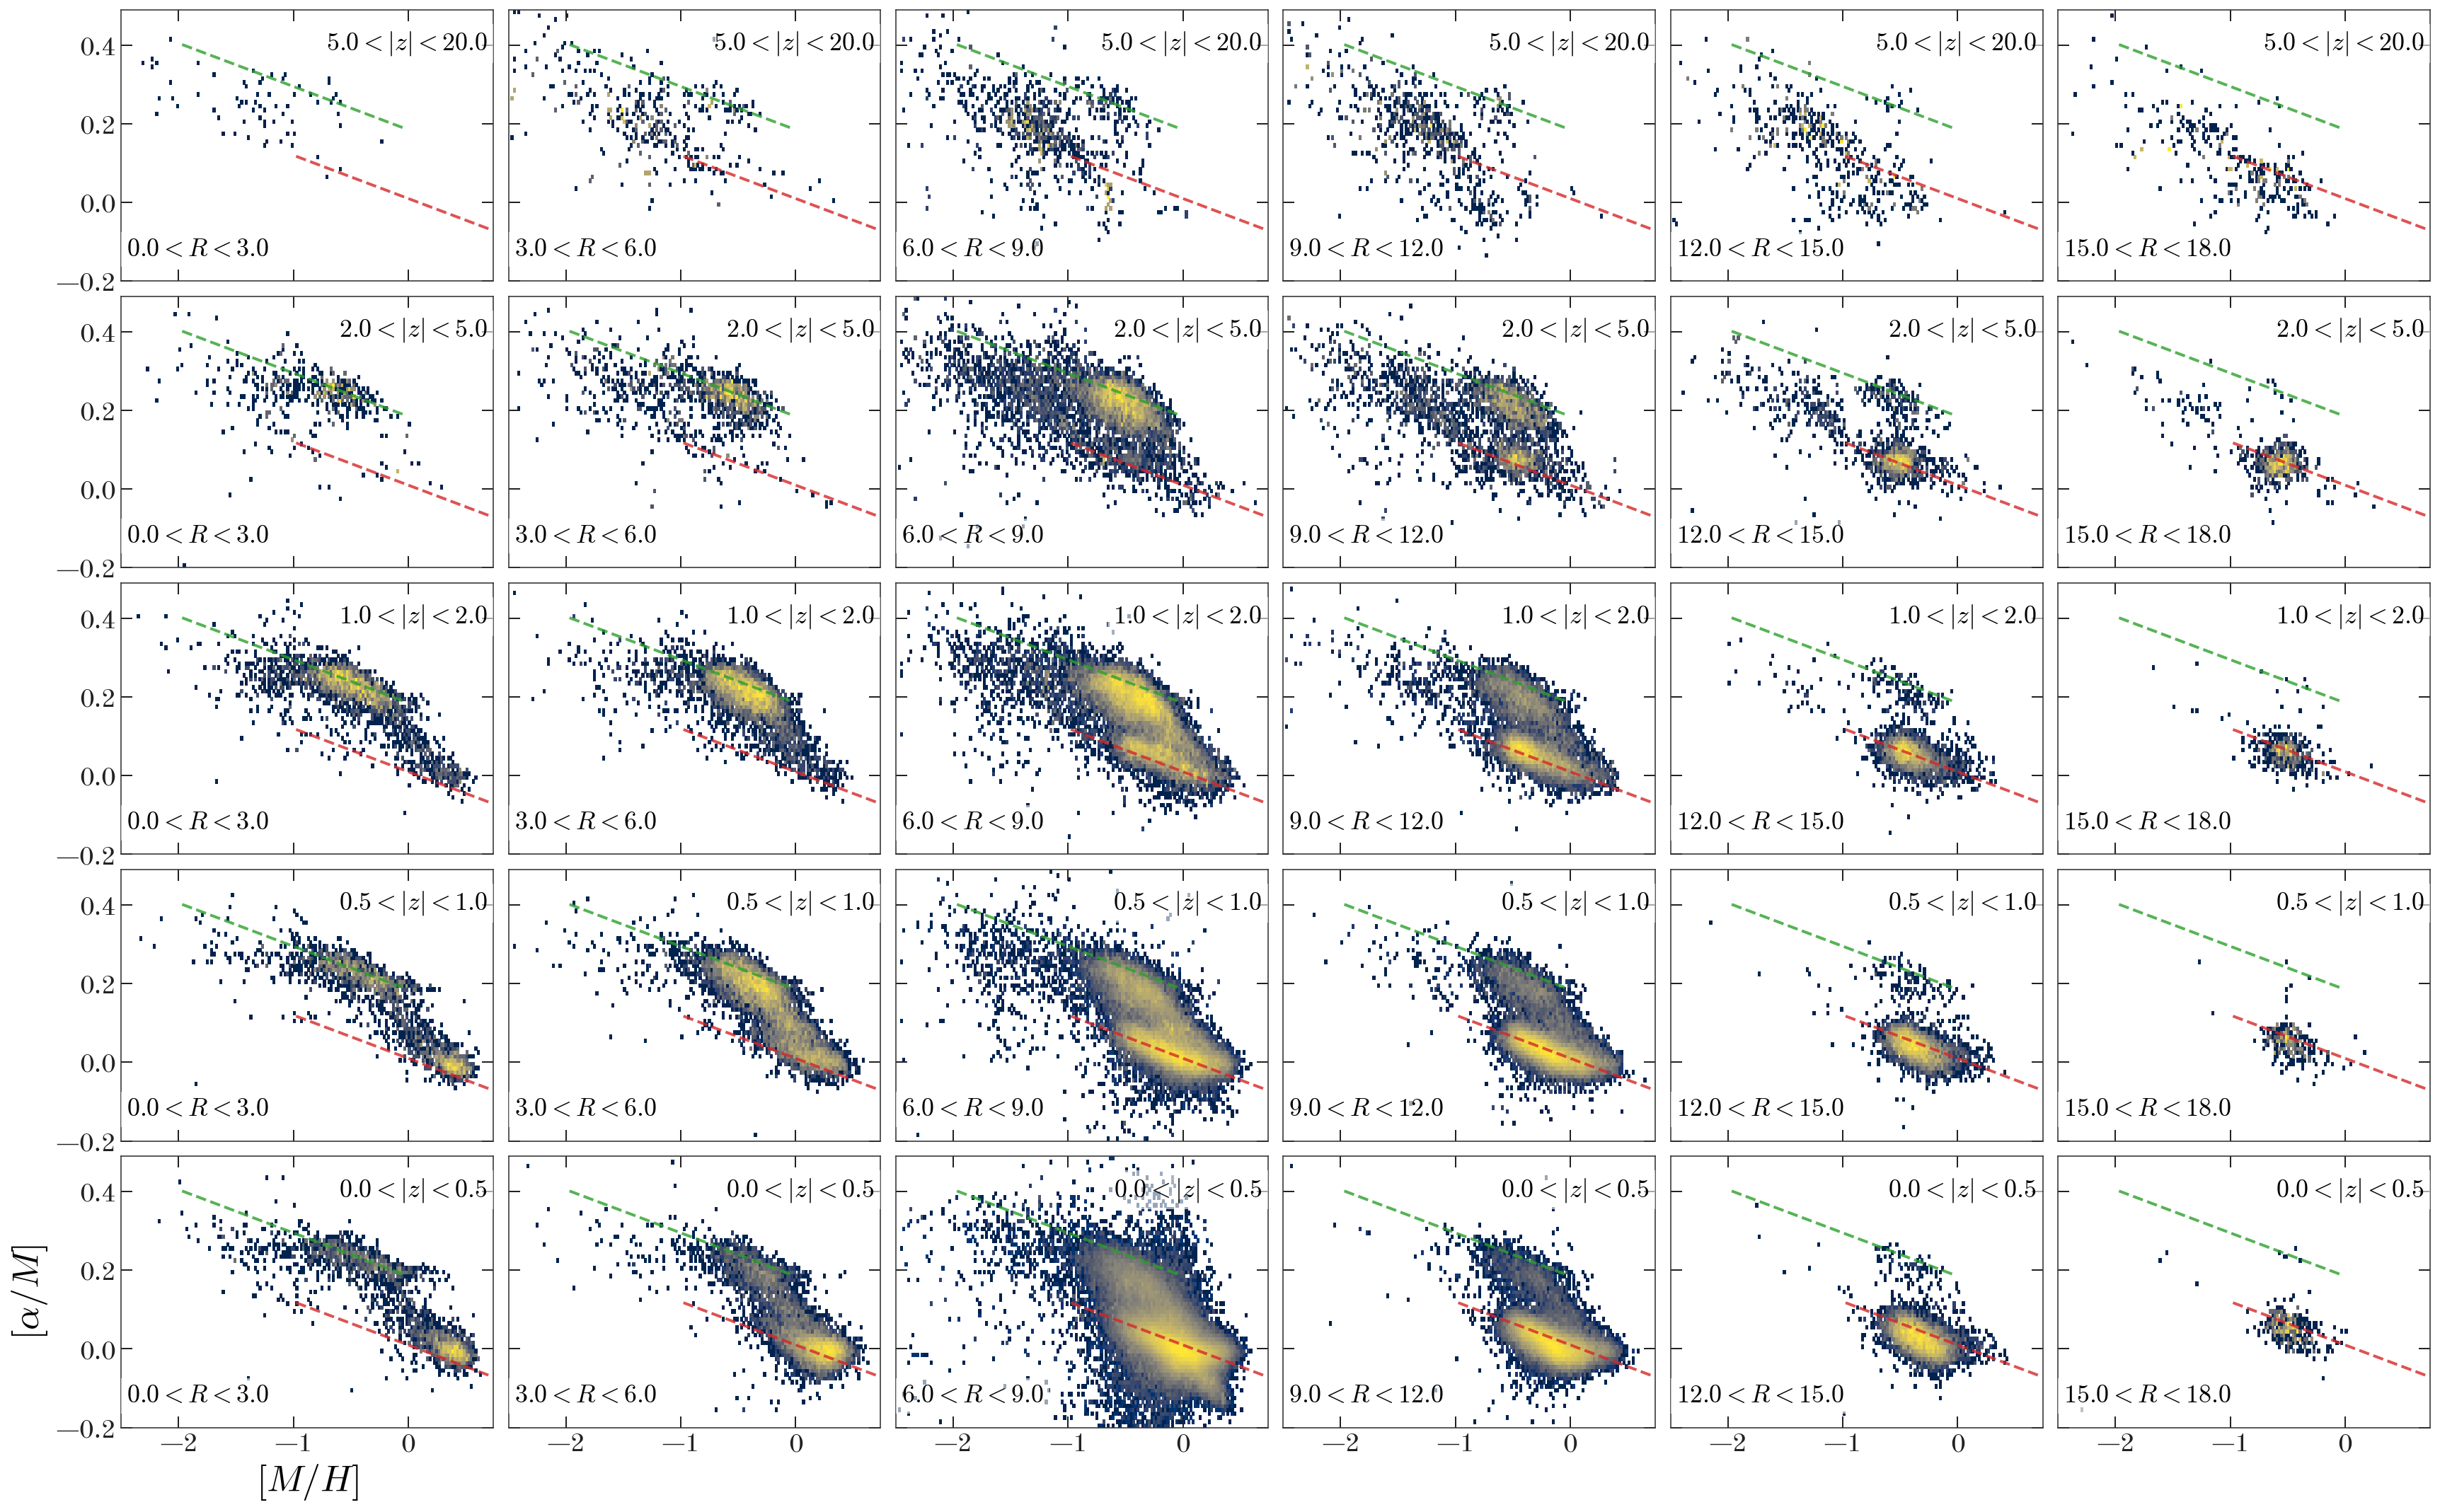

In [130]:
zbins = edges_to_bins([0, 0.5, 1, 2, 5, 20])
Rbins = edges_to_bins(np.arange(0, 18+1e-3, 3))

for extra_mask, name in zip([None, tt_dwarfs_mask],
                            ['all', 'no-dwarfs']):
    fig, axes = make_panels(tt['galr'], 
                            np.abs(tt['galz']),
                            Rbins, zbins[::-1],
                            'R', '|z|', extra_mask=extra_mask)

    for ax in axes.flat:
        xx = np.linspace(-2.5, 2, 128)
        
        _mask = (xx > -2) & (xx < 0.)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.185,
                marker='', ls='--', color='tab:green', alpha=0.8, zorder=100, lw=2)

        _mask = (xx > -1) & (xx < 0.75)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.01,
                marker='', ls='--', color='tab:red', alpha=0.8, zorder=100, lw=2)
        
    fig.savefig(f'R-z-MH-AlpM-{name}.png', dpi=256)

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:1210: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:1211: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:1210: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:1211: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))


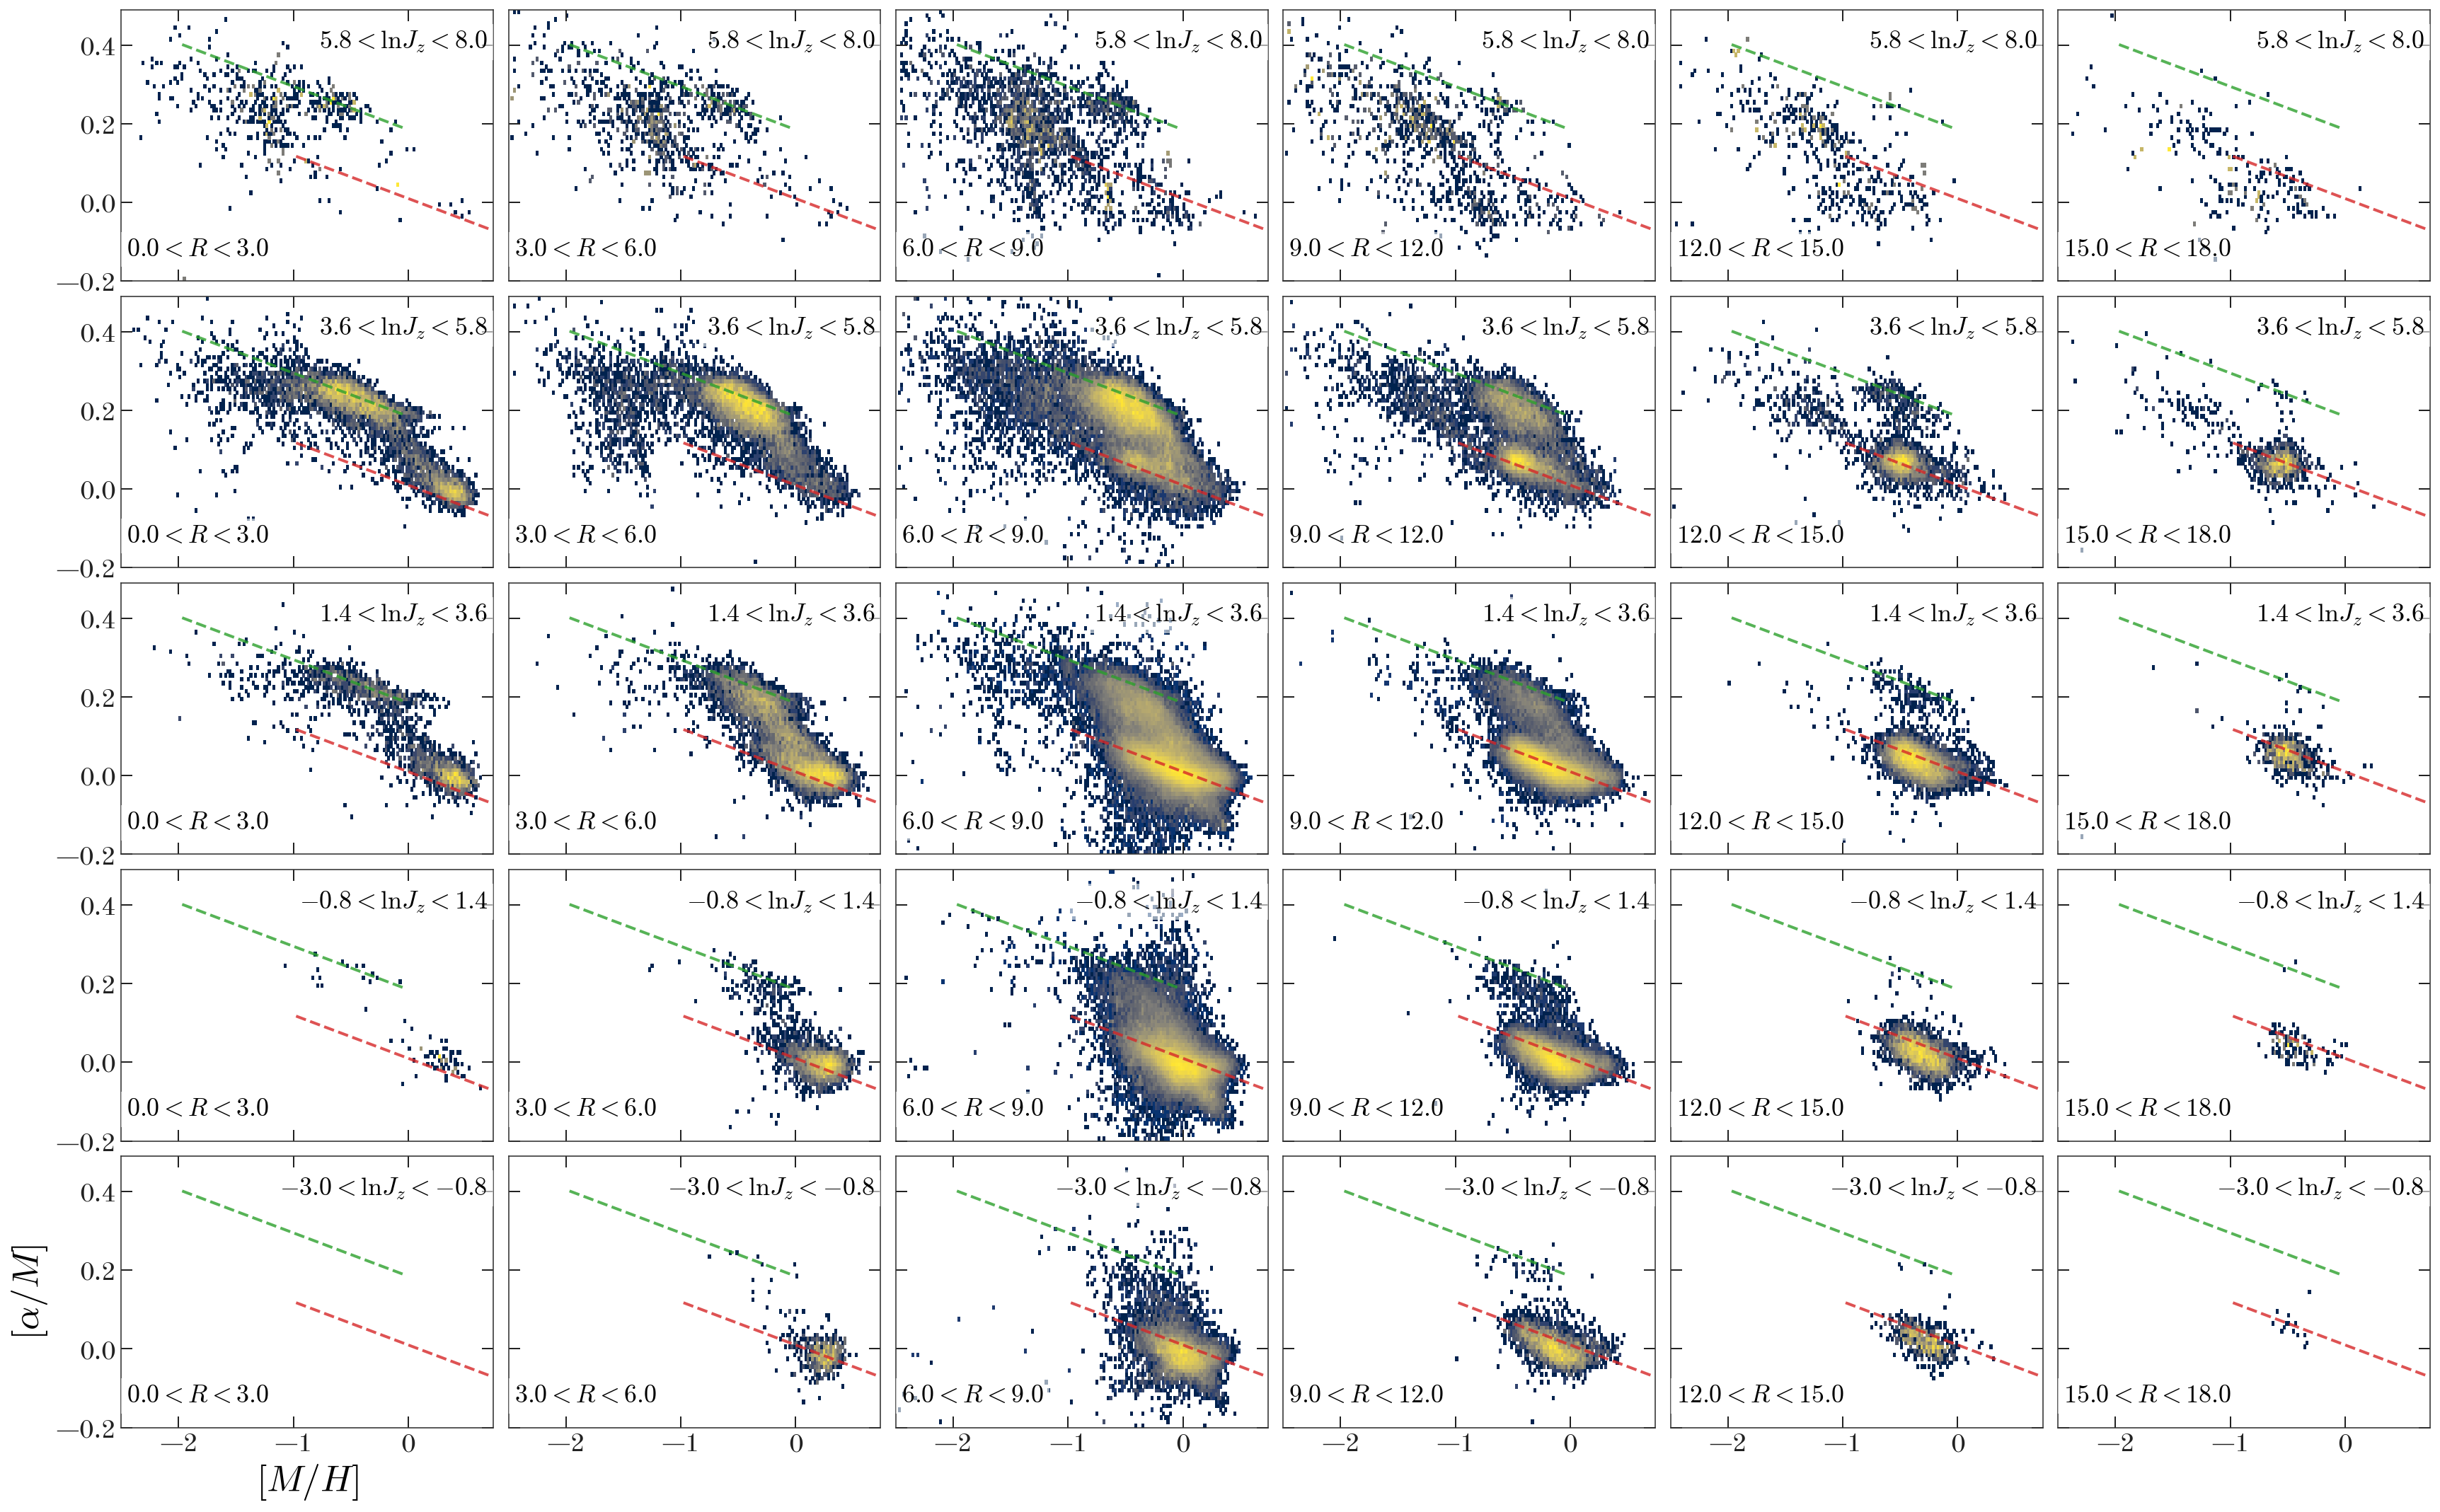

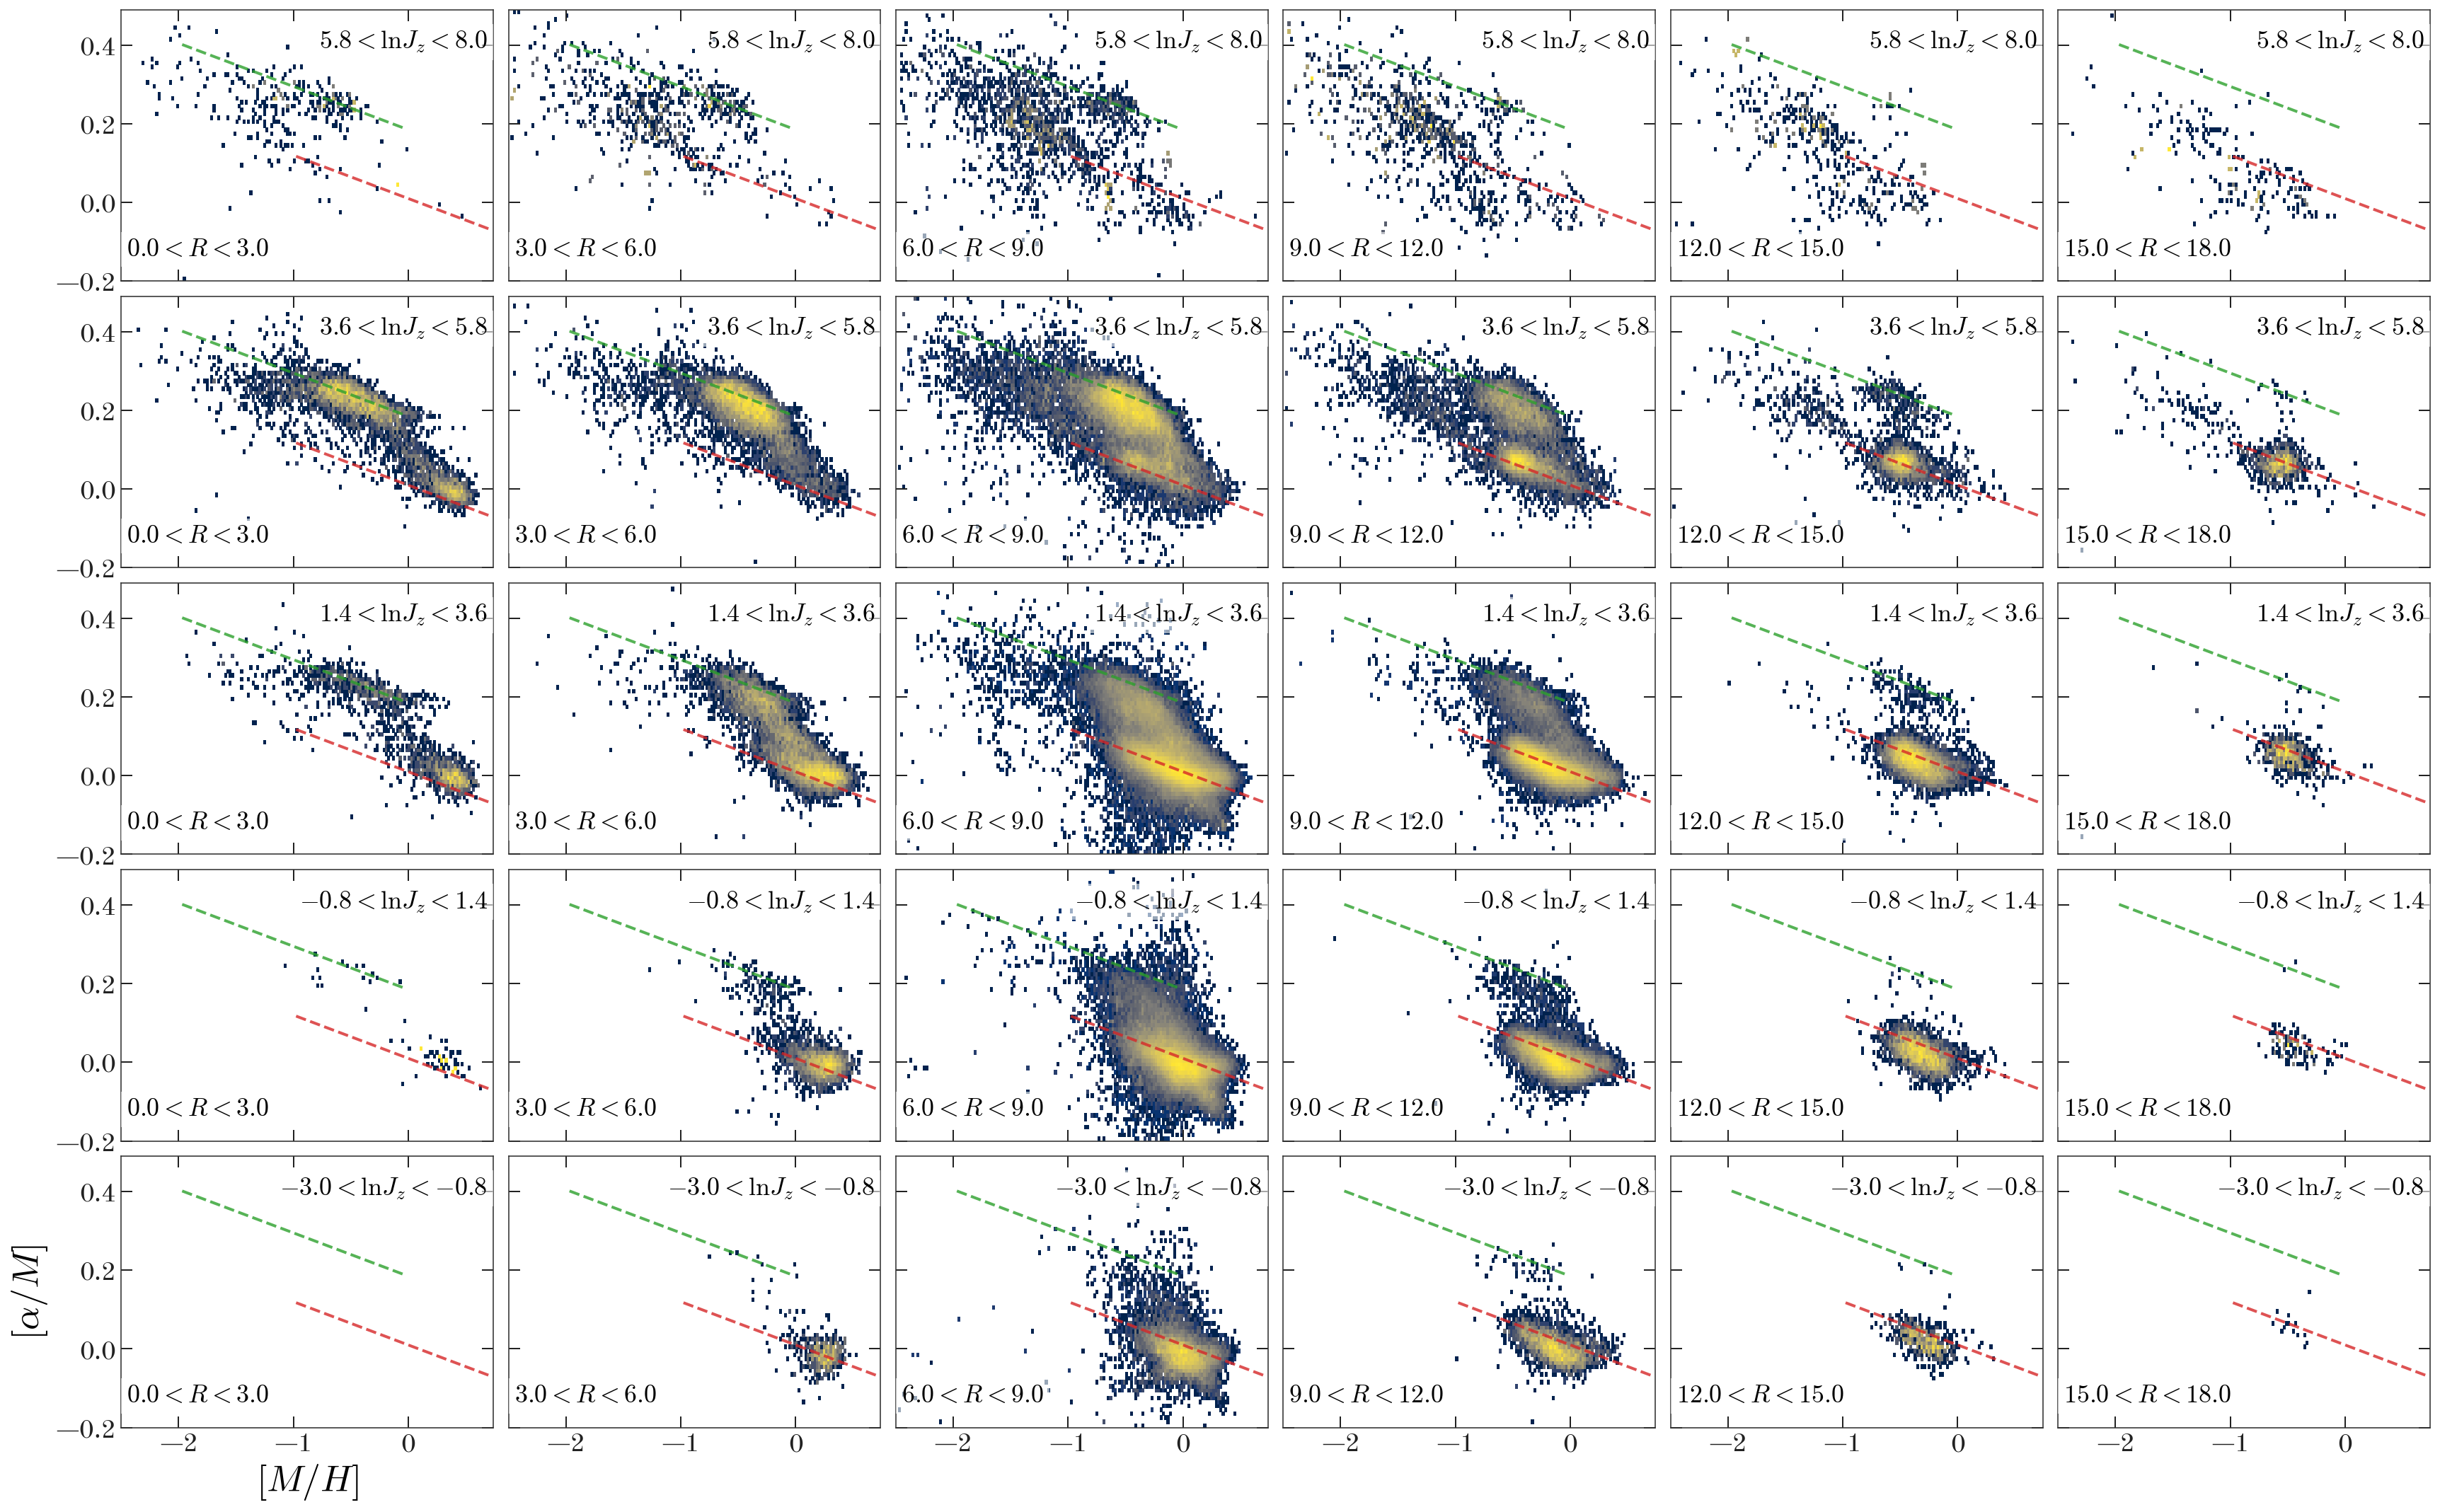

In [131]:
Rbins = edges_to_bins(np.arange(0, 18+1e-3, 3))

for extra_mask, name in zip([None, tt_dwarfs_mask],
                            ['all', 'no-dwarfs']):
    fig, axes = make_panels(tt['galr'], logjz,
                            Rbins, logjz_bins,
                            'R', r'\ln J_z',
                            extra_mask=extra_mask)

    for ax in axes.flat:
        _mask = (xx > -2) & (xx < 0.)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.185,
                marker='', ls='--', color='tab:green', alpha=0.8, zorder=100, lw=2)

        _mask = (xx > -1) & (xx < 0.75)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.01,
                marker='', ls='--', color='tab:red', alpha=0.8, zorder=100, lw=2)
    fig.savefig(f'R-Jz-MH-AlpM-{name}.png', dpi=256)

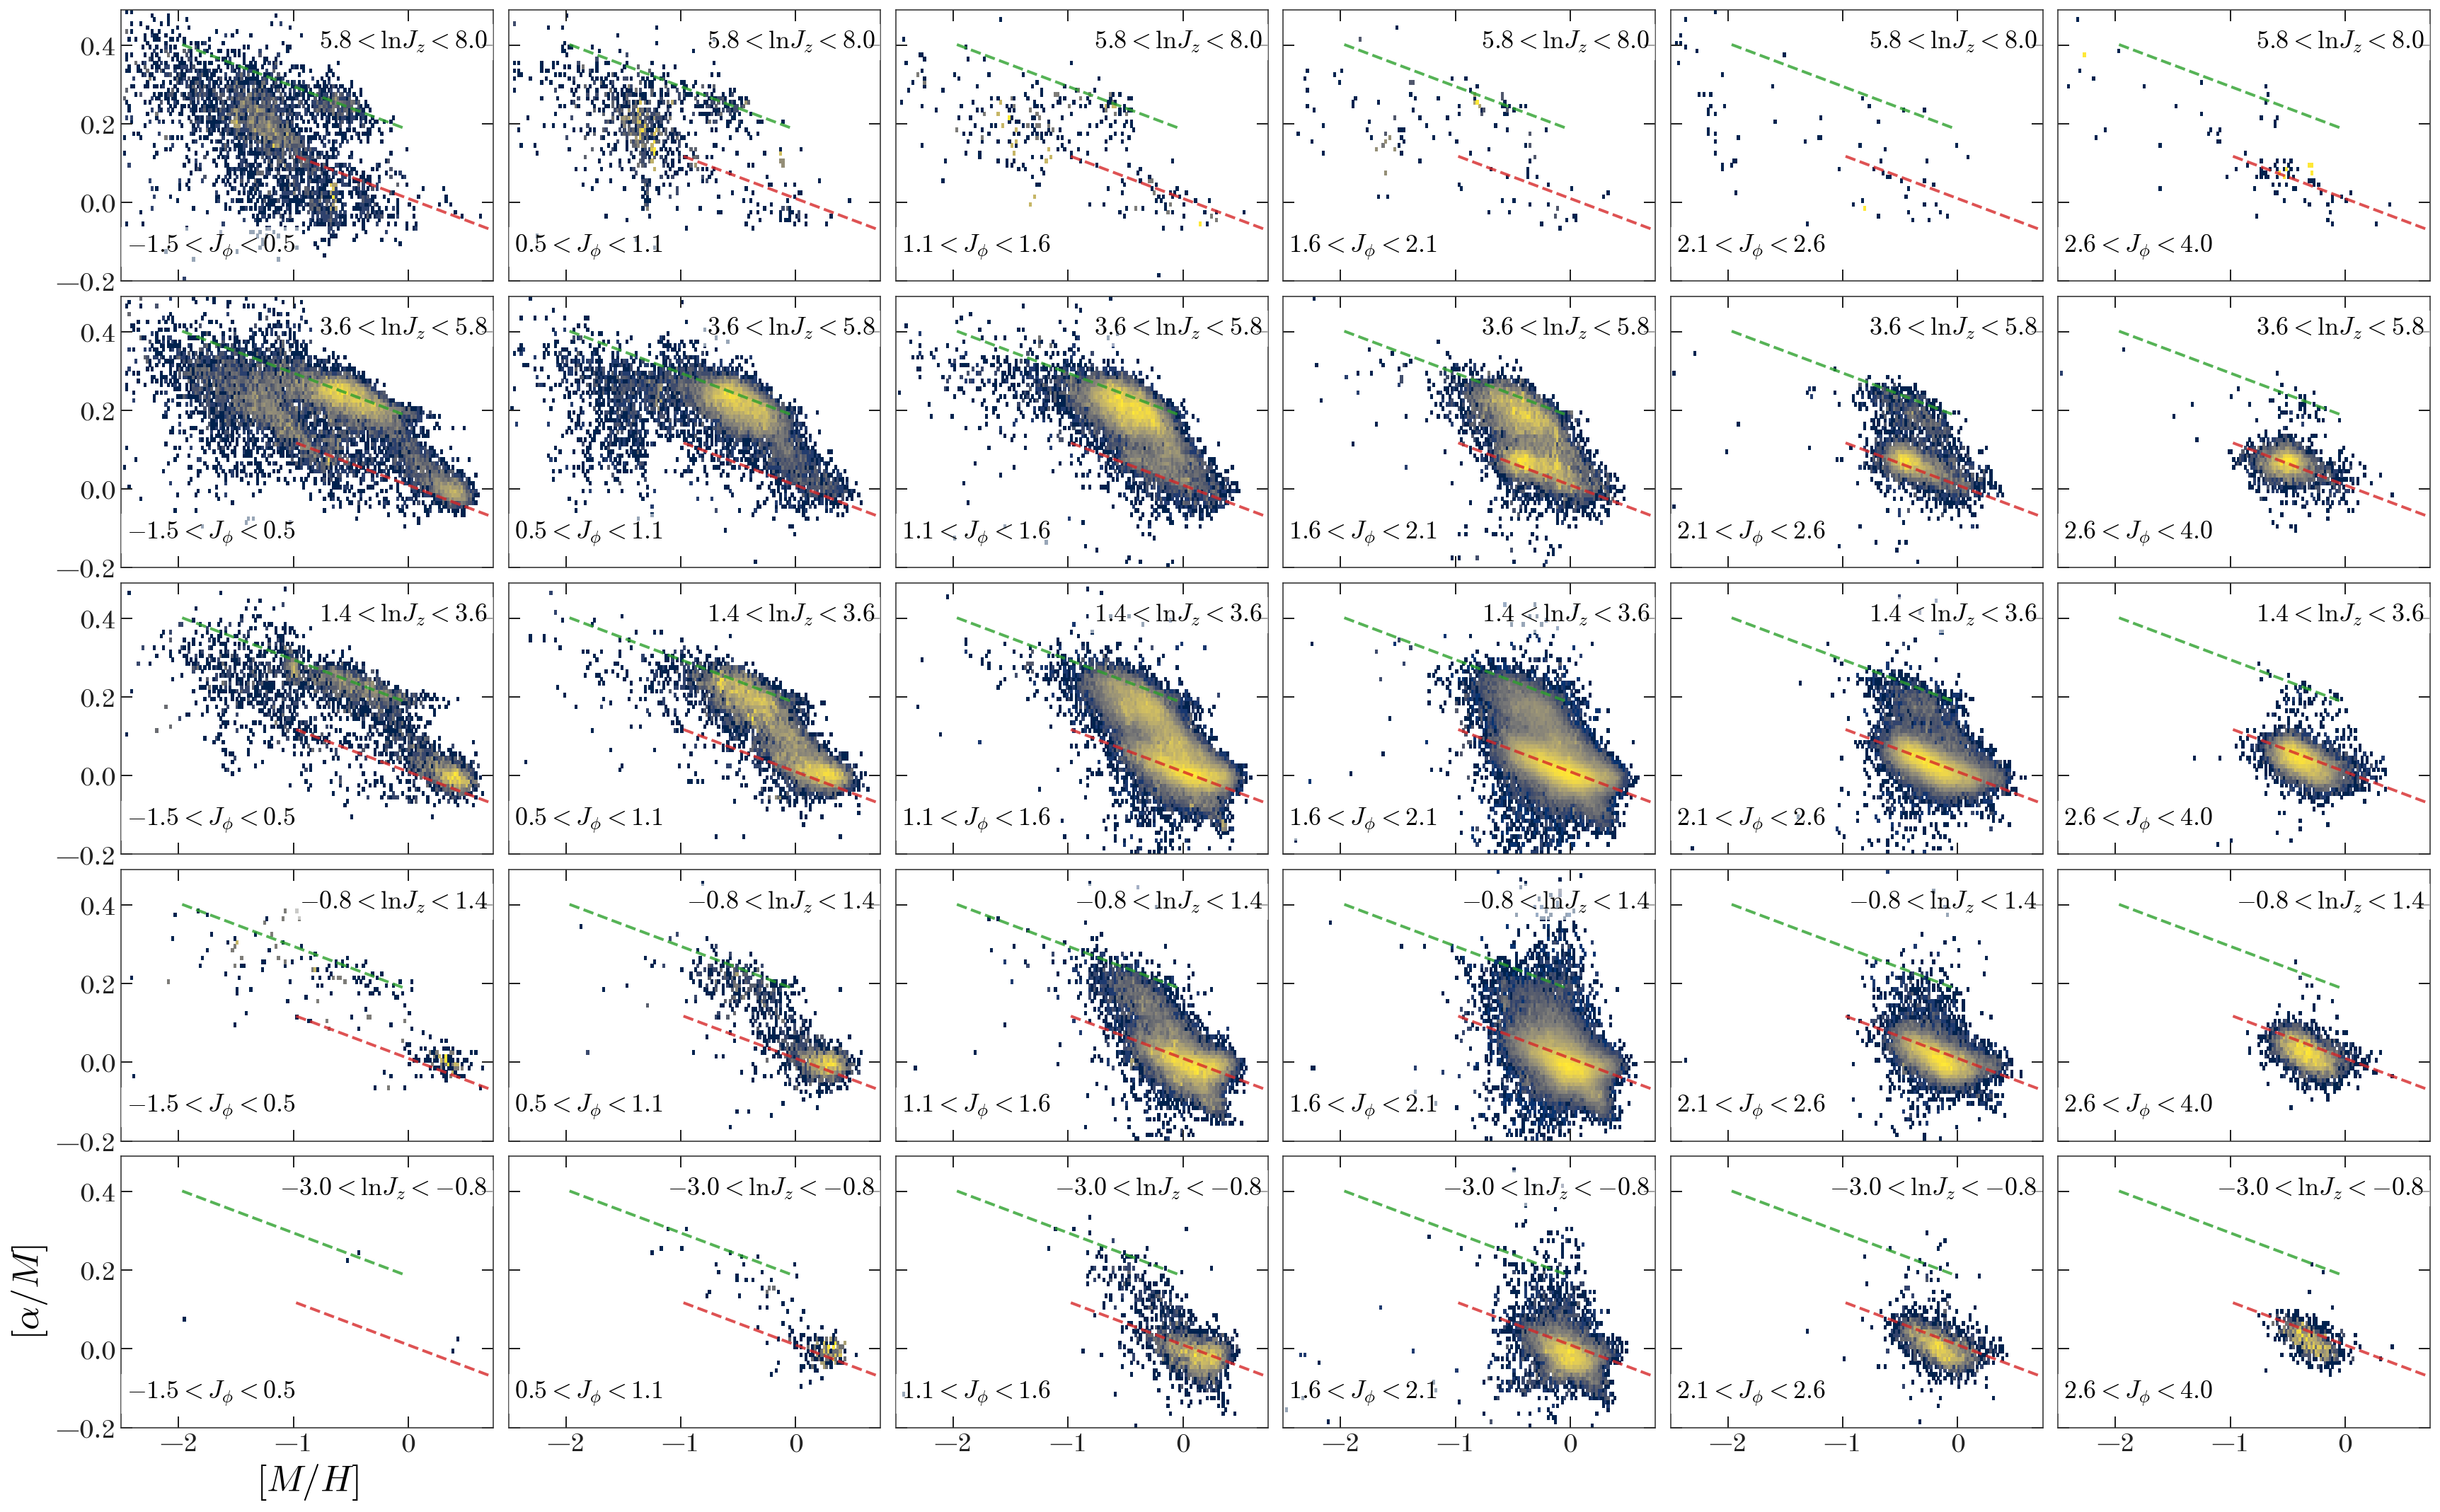

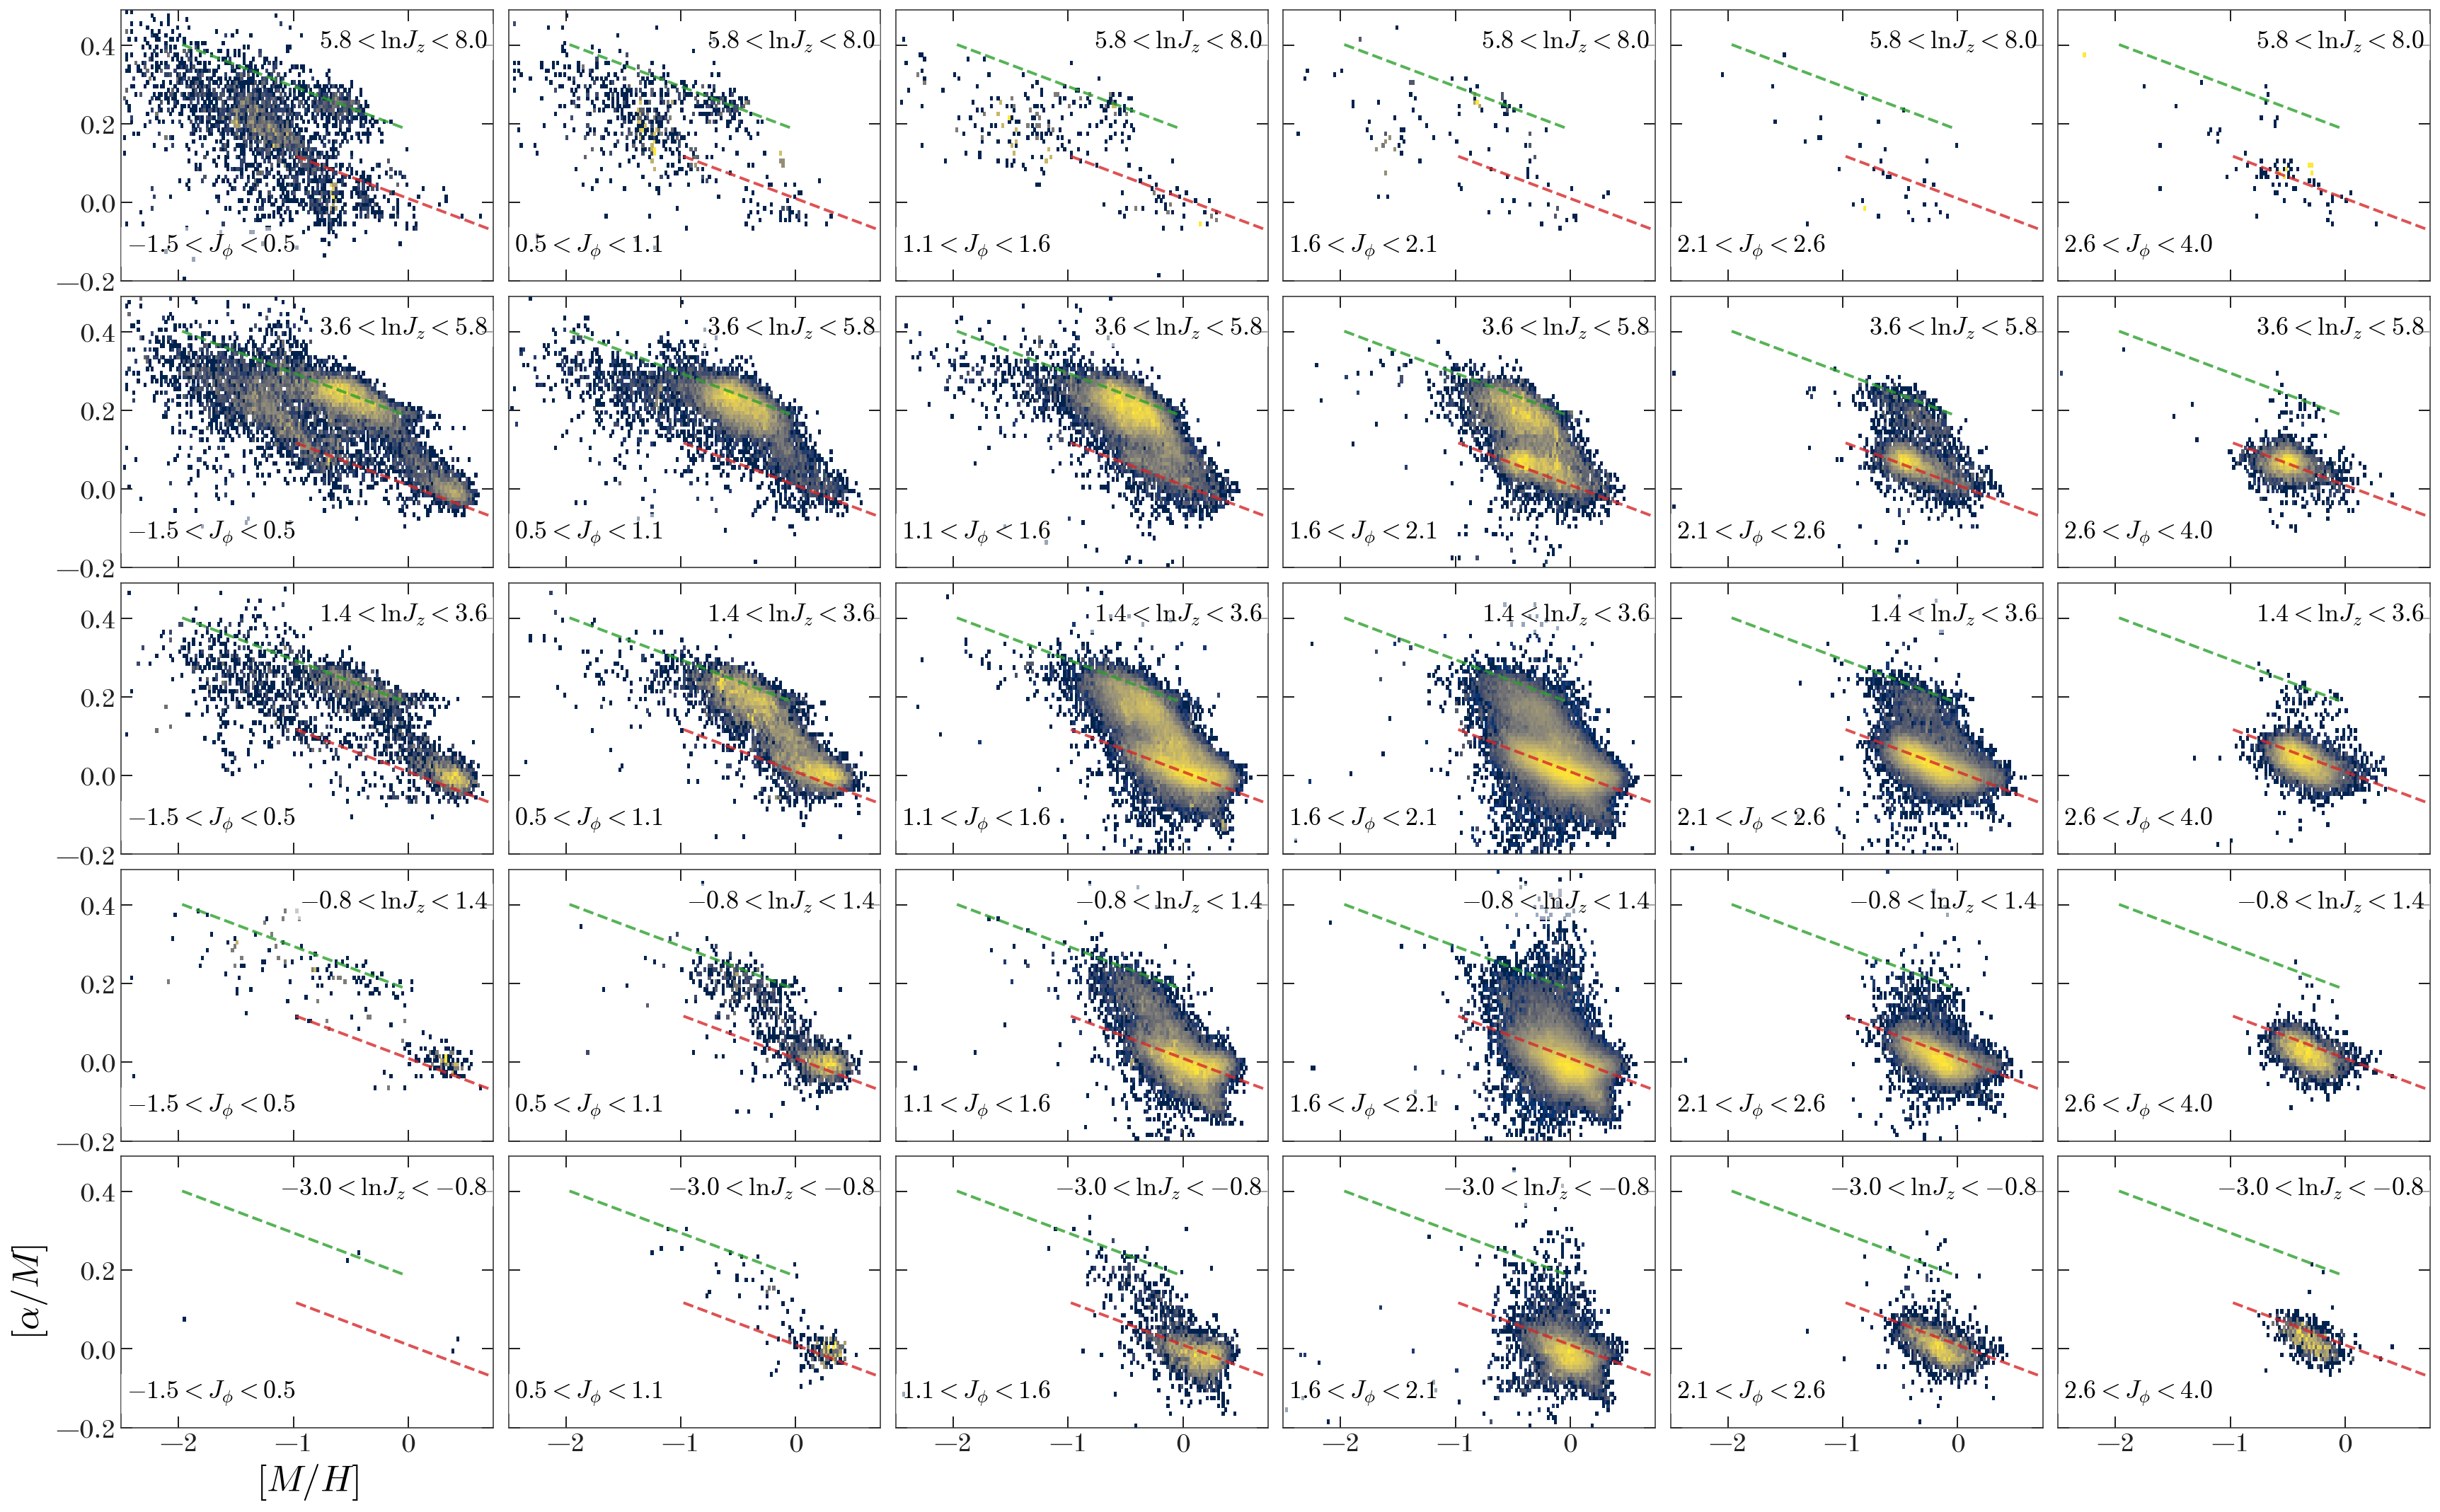

In [132]:
for extra_mask, name in zip([None, tt_dwarfs_mask],
                            ['all', 'no-dwarfs']):
    fig, axes = make_panels(jphi, logjz,
                            jphi_bins, logjz_bins,
                            r'J_\phi', r'\ln J_z',
                            extra_mask=extra_mask)

    for ax in axes.flat:
        _mask = (xx > -2) & (xx < 0.)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.185,
                marker='', ls='--', color='tab:green', alpha=0.8, zorder=100, lw=2)

        _mask = (xx > -1) & (xx < 0.75)
        ax.plot(xx[_mask], 
                -0.11 * (xx[_mask] - 0) + 0.01,
                marker='', ls='--', color='tab:red', alpha=0.8, zorder=100, lw=2)
        
    fig.savefig(f'Jphi-Jz-MH-AlpM-{name}.png', dpi=300)

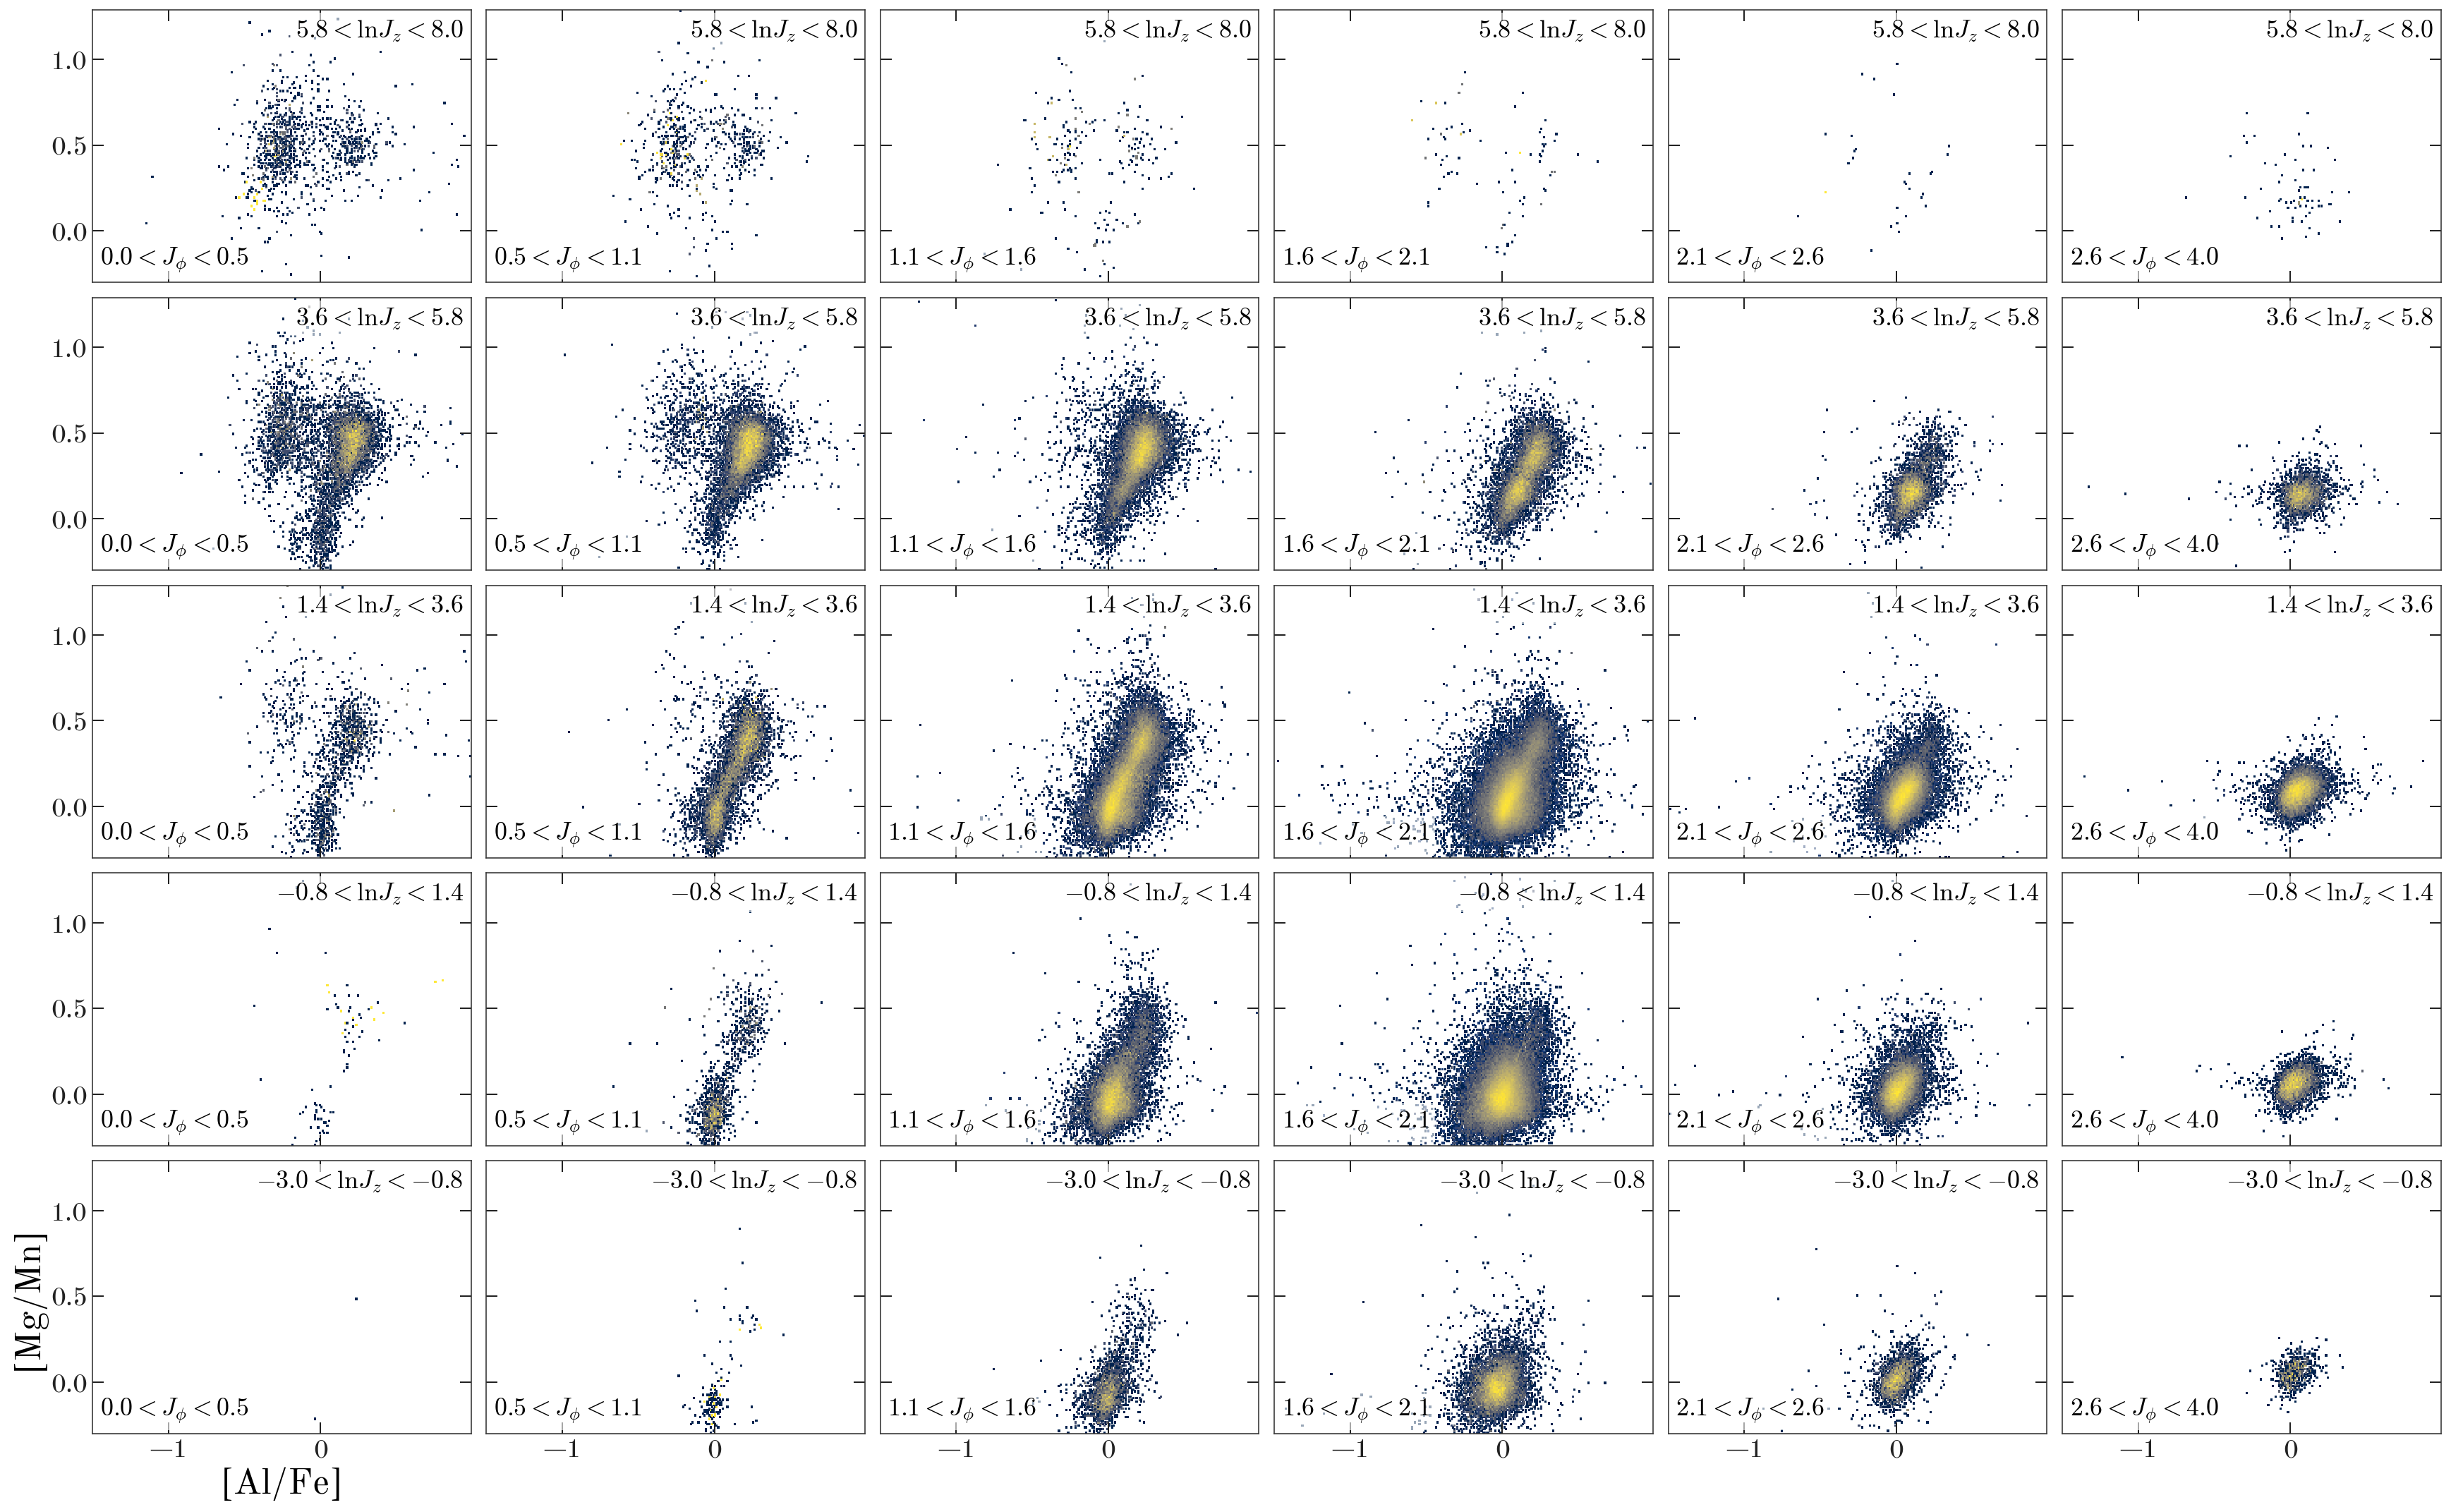

In [134]:
Rbins = edges_to_bins(np.arange(0, 18+1e-3, 3))

logjz_bins = edges_to_bins(np.linspace(-3, 8, 5+1))[::-1]
logjz = np.log(tt['jz'])

fig, axes = make_panels(logjphi, logjz,
                        logjphi_bins, logjz_bins,
                        r'J_\phi', r'\ln J_z',
                        extra_mask=tt_dwarfs_mask,
                        abun1=tt['AL_FE'],
                        abun2=tt['MG_FE'] - tt['MN_FE'],
                        abun1_label='[Al/Fe]',
                        abun2_label='[Mg/Mn]',
                        bins=(np.arange(-1.5, 1., 0.01),
                              np.arange(-0.3, 1.3, 0.01)))

fig.savefig(f'Jphi-Jz-Al-MgMn-no-dwarfs.png', dpi=300)

**X-shape in the low-alpha sequence?**


Sten suggests it could be "hot dwarfs", try TEFF cut:

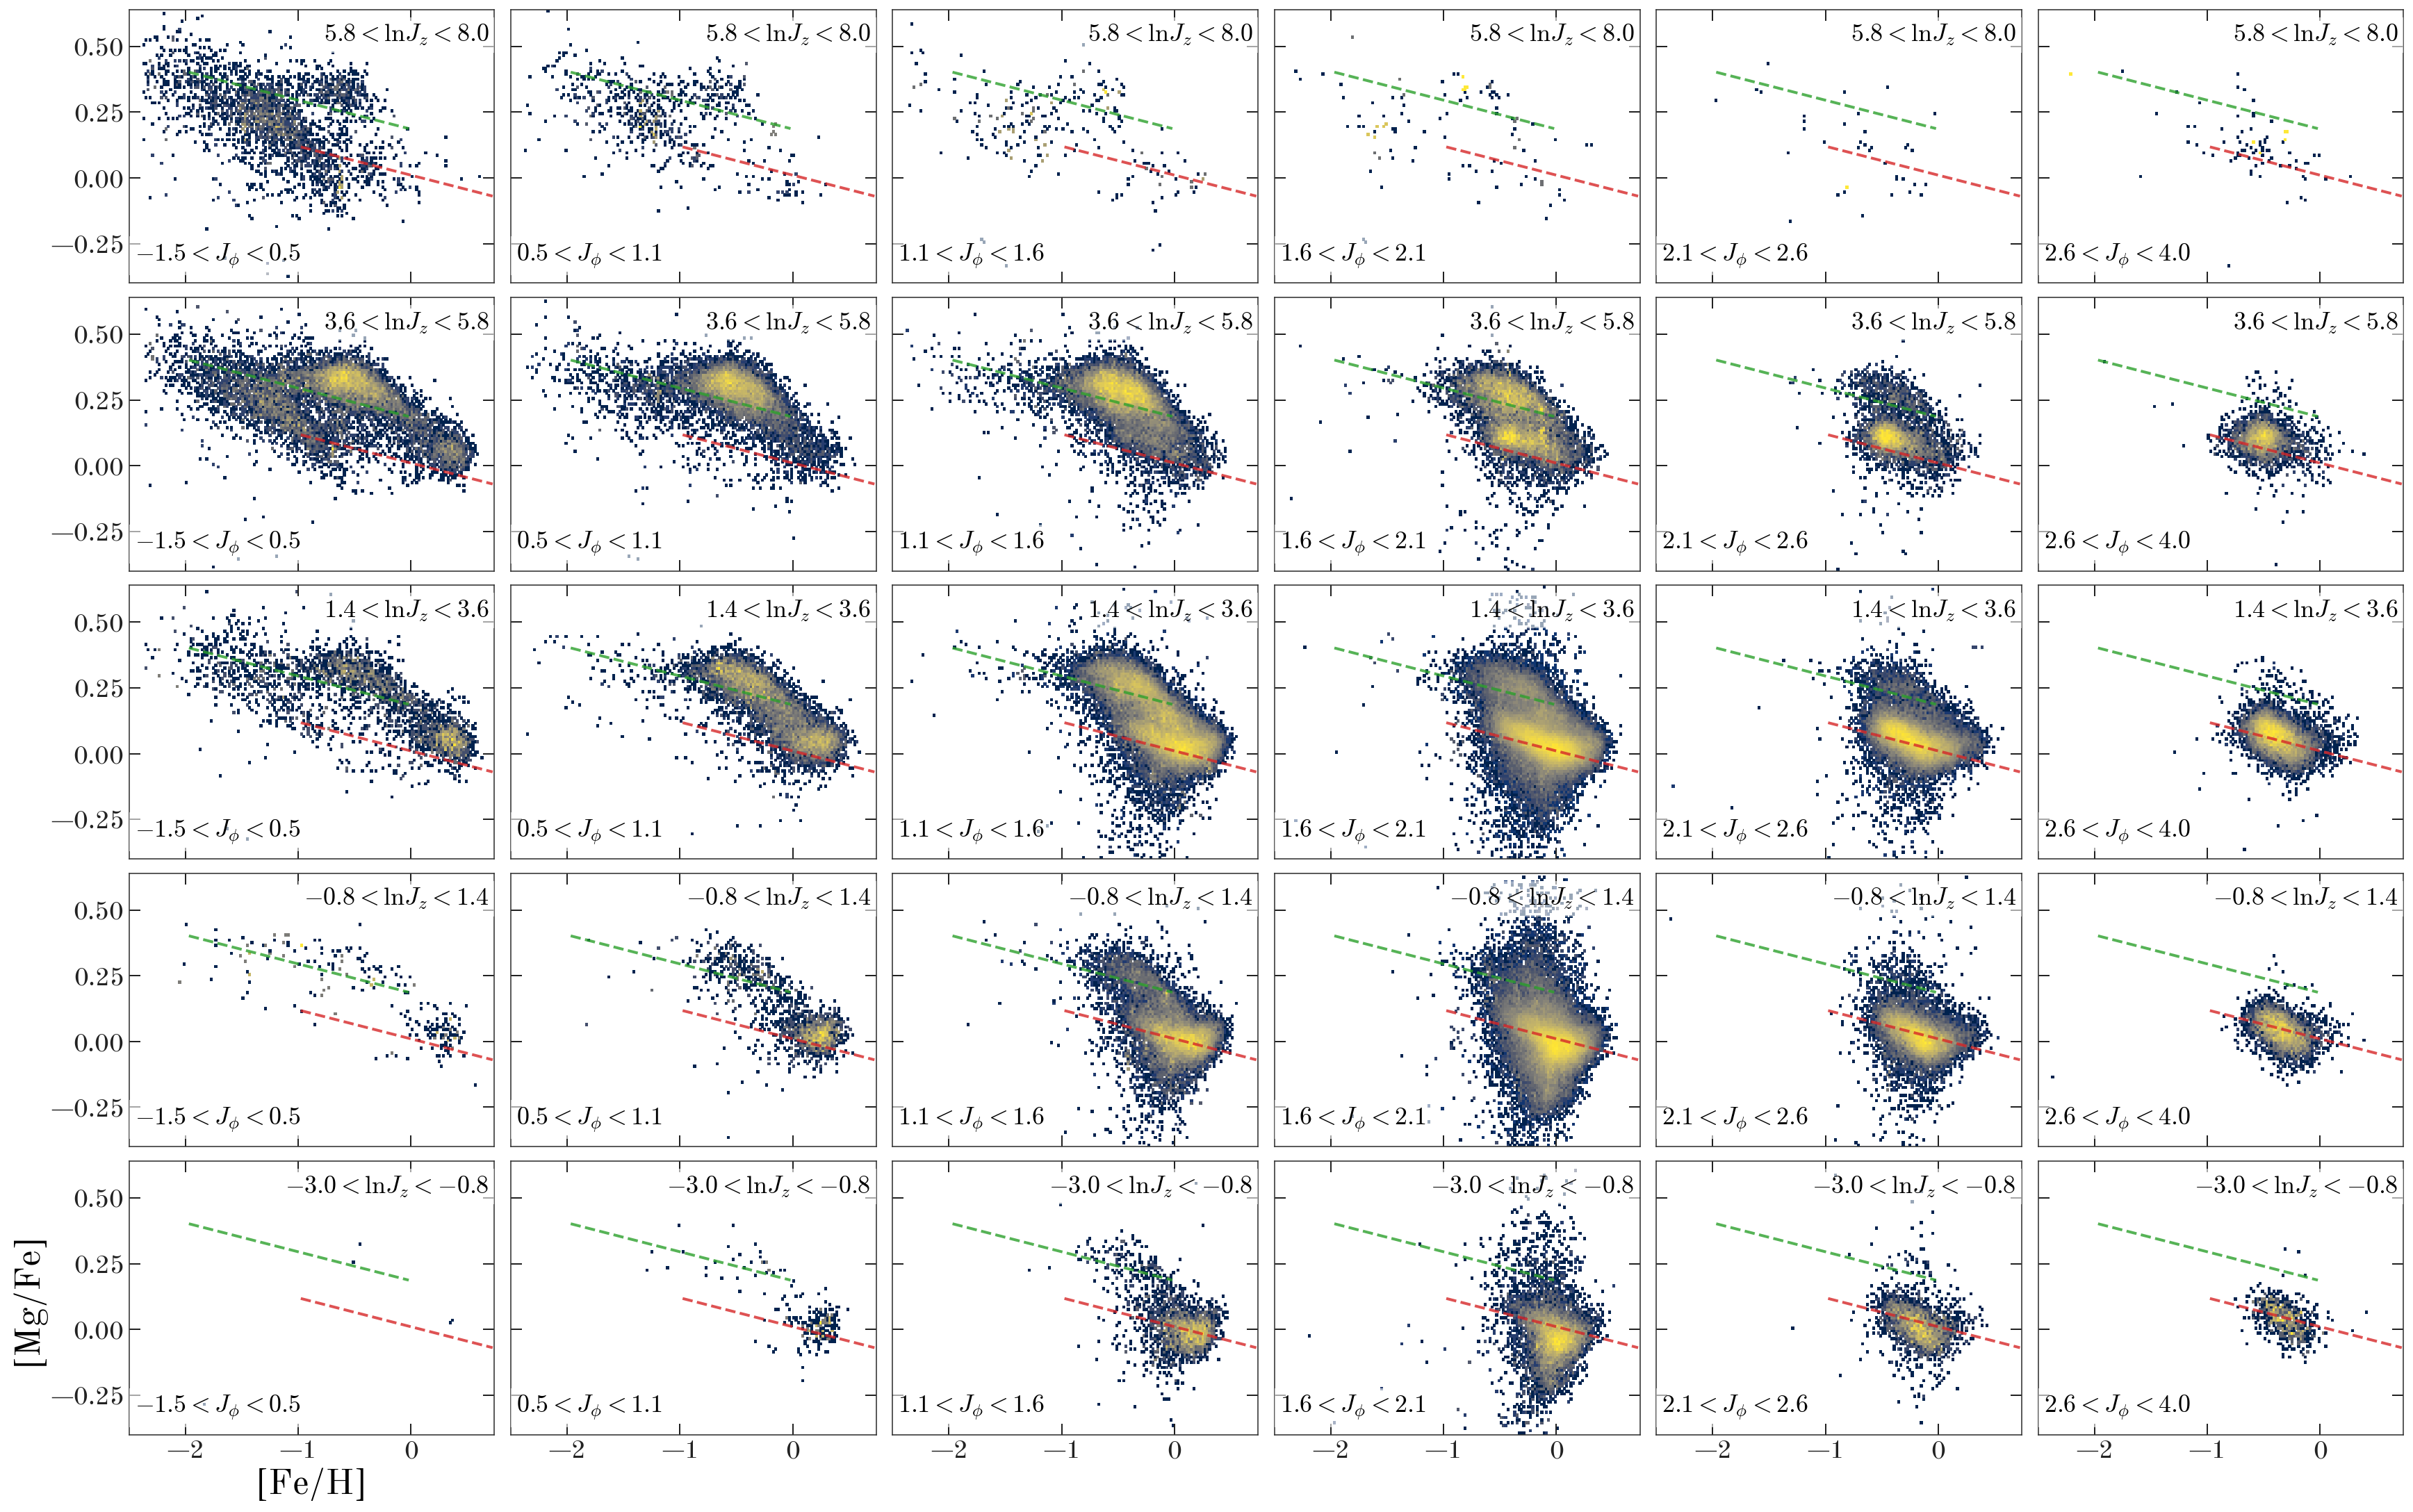

In [147]:
bins = (np.arange(-2.5, 0.75, 0.02),
        np.arange(-0.4, 0.65, 0.01))

fig, axes = make_panels(jphi, logjz,
                        jphi_bins, logjz_bins,
                        r'J_\phi', r'\ln J_z',
                        abun1='FE_H', abun2='MG_FE',
                        extra_mask=tt_dwarfs_mask,
                        bins=bins)

for ax in axes.flat:
    _mask = (xx > -2) & (xx < 0.)
    ax.plot(xx[_mask], 
            -0.11 * (xx[_mask] - 0) + 0.185,
            marker='', ls='--', color='tab:green', alpha=0.8, zorder=100, lw=2)

    _mask = (xx > -1) & (xx < 0.75)
    ax.plot(xx[_mask], 
            -0.11 * (xx[_mask] - 0) + 0.01,
            marker='', ls='--', color='tab:red', alpha=0.8, zorder=100, lw=2)

fig.savefig(f'Jphi-Jz-FeH-MgFe-no-dwarfs.png', dpi=300)

In [25]:
# z_ptl = np.nanpercentile(np.abs(tt['galz']), np.linspace(0, 100, 6))
# R_ptl = np.nanpercentile(tt['galr'], np.linspace(0, 100, 6))

# _ = make_panels(tt['galr'], np.abs(tt['galz']),
#                 edges_to_bins(R_ptl), edges_to_bins(z_ptl)[::-1],
#                 'R', '|z|')

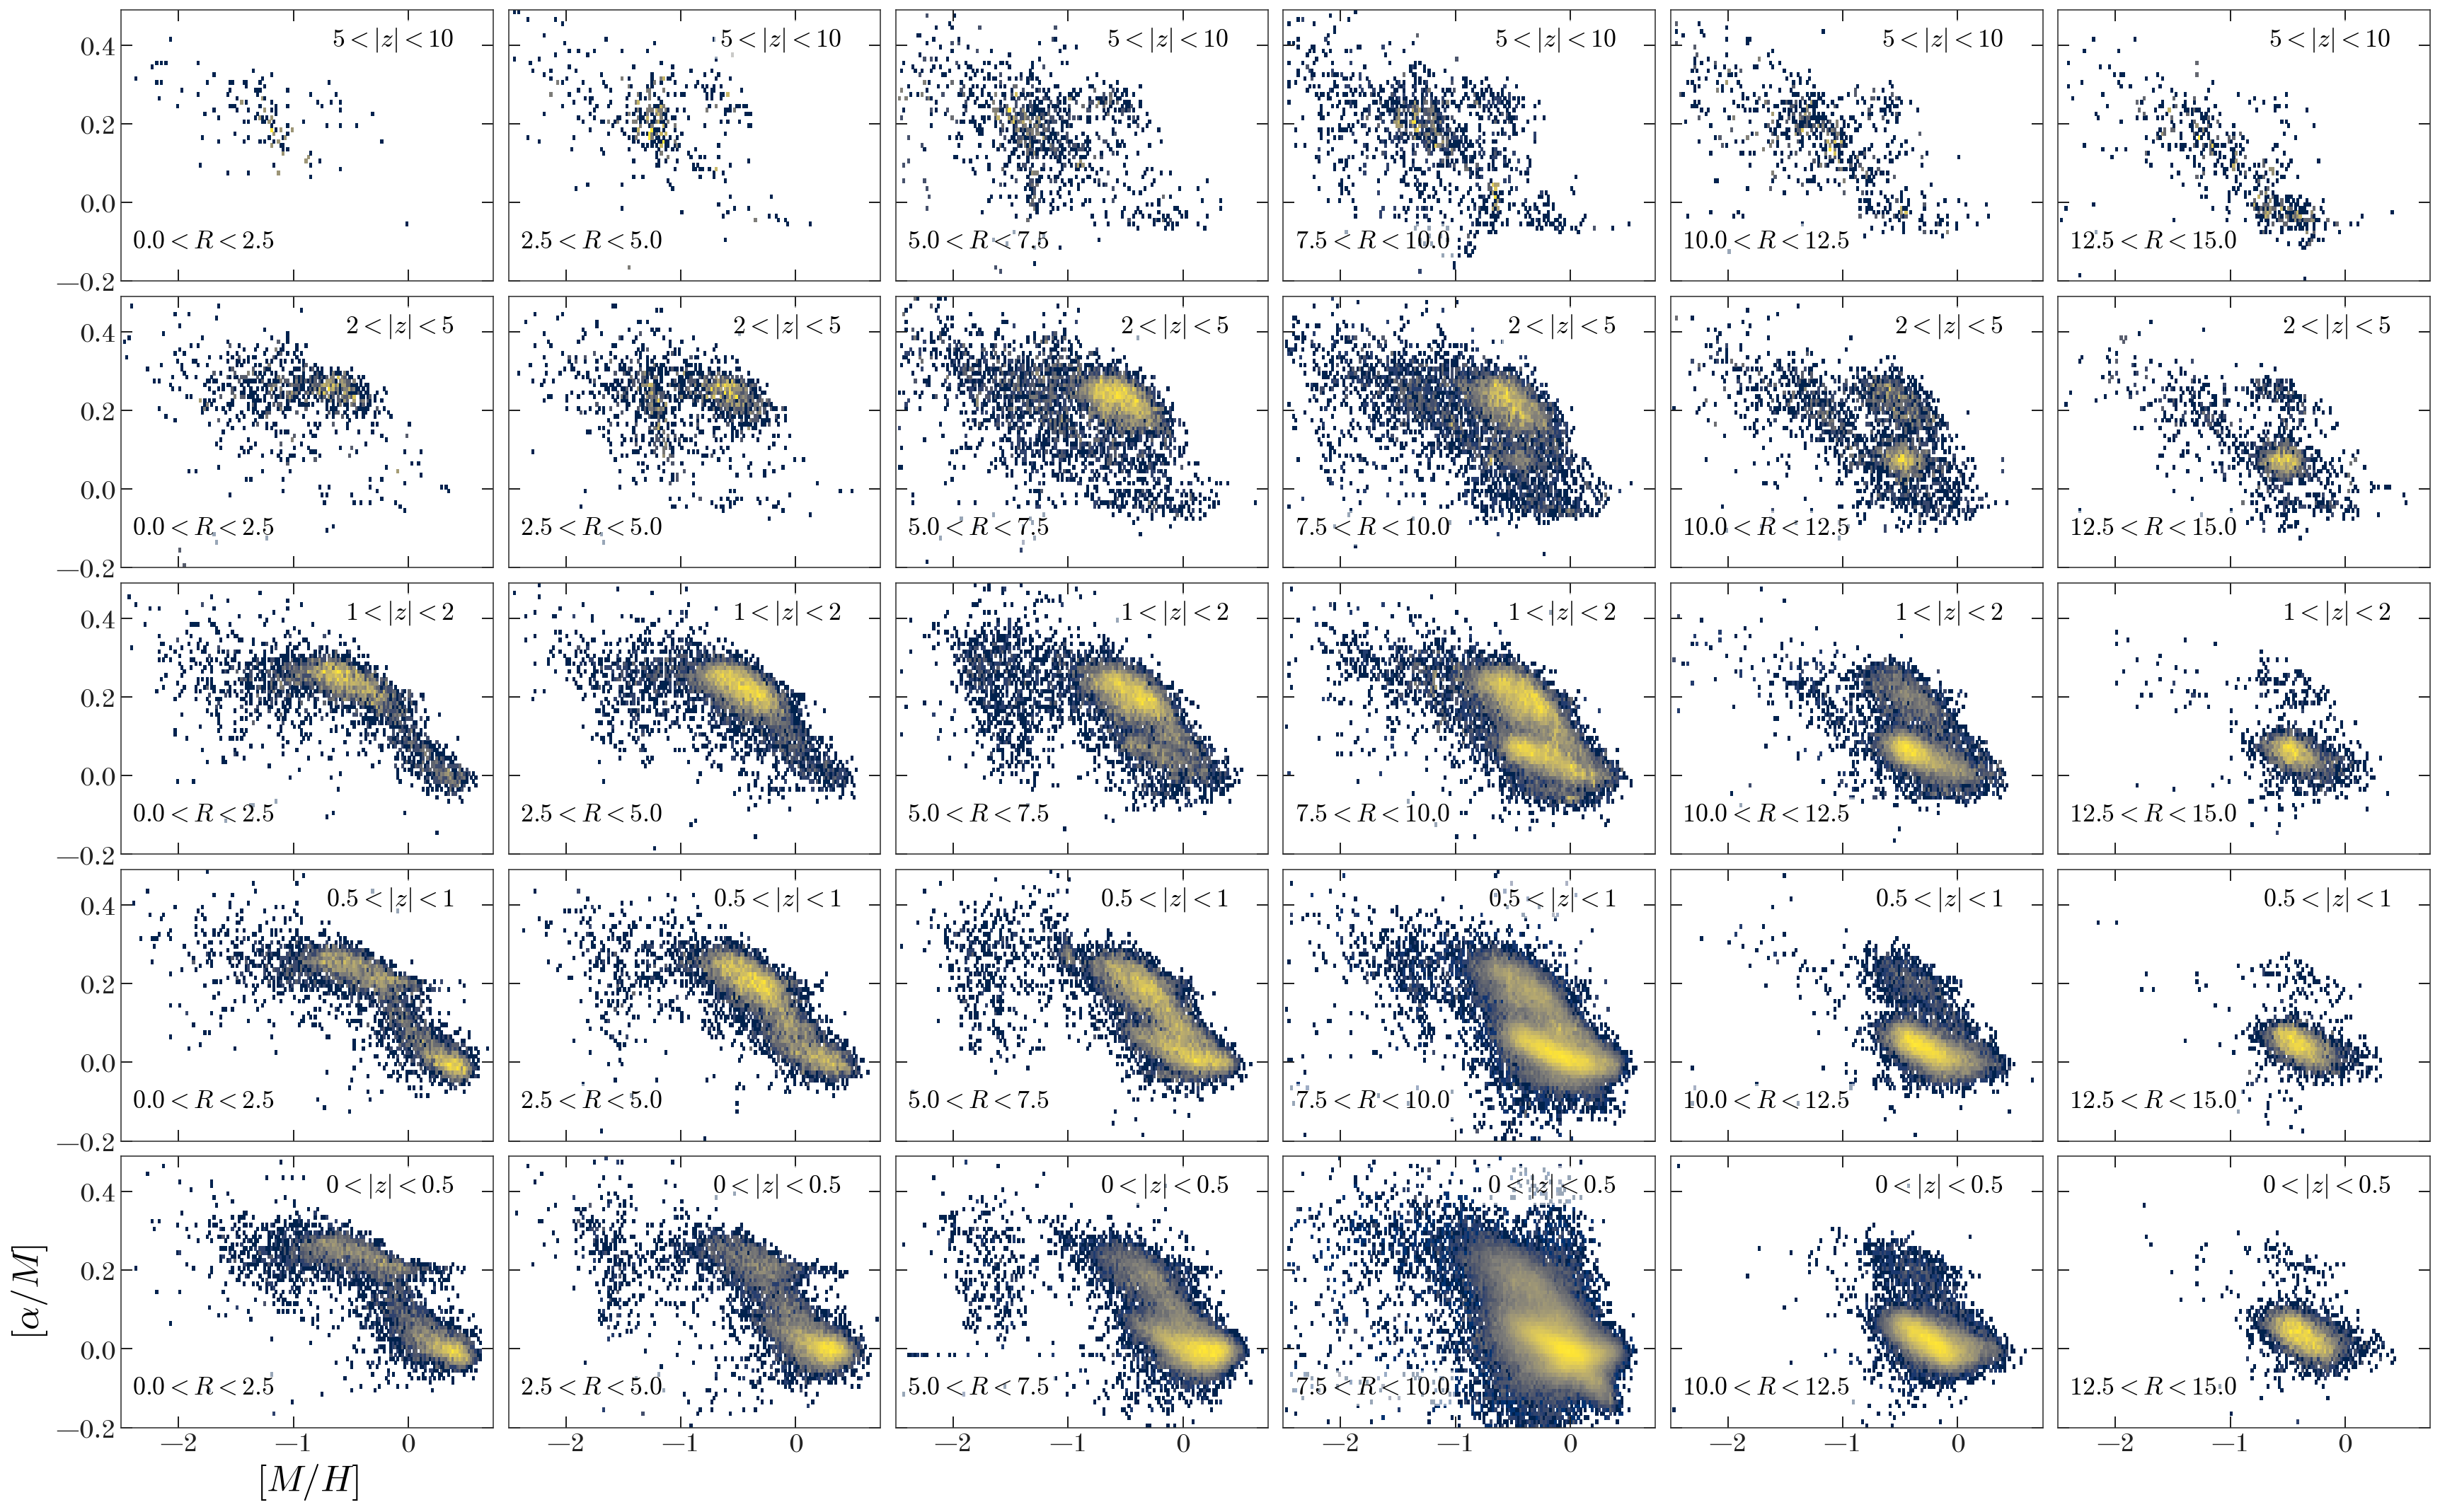

In [6]:
fig, axes = plt.subplots(len(zbins), len(Rbins), 
                         figsize=(4 * len(Rbins), 
                                  4 * len(zbins) * 0.75),
                         sharex=True, sharey=True)

bins = (np.arange(-2.5, 0.75, 0.02),
        np.arange(-0.2, 0.5, 0.01))
for i in range(len(zbins)):
    for j in range(len(Rbins)):
        ax = axes[i, j]
        
        rz_mask = ((t['galr'] > Rbins[j][0]) & (t['galr'] < Rbins[j][1]) & 
                   (np.abs(t['galz']) > zbins[i][0]) & (np.abs(t['galz']) < zbins[i][1]))
        
        ax.hist2d(t['M_H'][rz_mask], t['ALPHA_M'][rz_mask],
                  bins=bins, norm=mpl.colors.LogNorm(), 
                  cmap='cividis')
        
        l, r = zbins[i]
        ax.text(0.4, 0.45, rf'${l} < |z| < {r}$', 
                ha='right', va='top', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))
        
        l, r = Rbins[j]
        ax.text(-2.4, -0.13, rf'${l} < R < {r}$', 
                ha='left', va='bottom', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))

axes[-1, 0].set_ylabel(r'$[\alpha/M]$', fontsize=26)
axes[-1, 0].set_xlabel(r'$[M/H]$', fontsize=26)
        
fig.tight_layout()
fig.set_facecolor('w')

Actions instead:

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


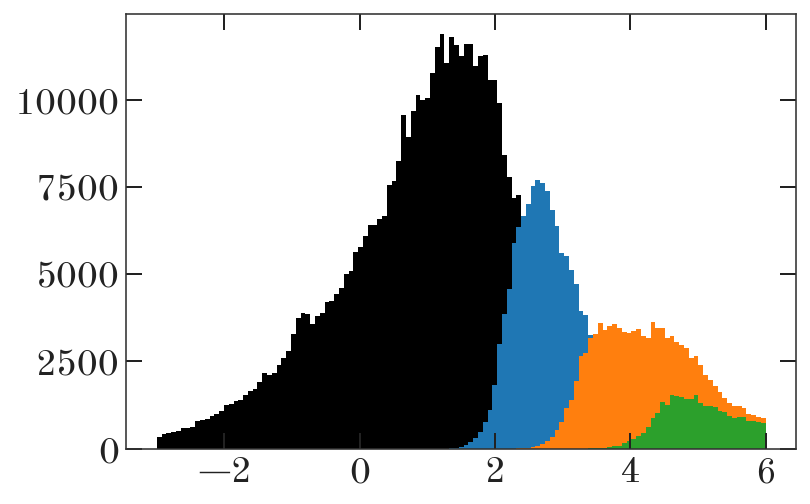

In [7]:
ratio = t['jz']
bins = np.linspace(-3, 6, 128)

x = np.log(ratio)[np.abs(t['galz']) < 0.5]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[(np.abs(t['galz']) > 0.5) & (np.abs(t['galz']) < 1)]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[np.abs(t['galz']) > 1.]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[np.abs(t['galz']) > 2.]
plt.hist(x[np.isfinite(x)], bins=bins);

In [8]:
# logjz_bins = [(-3, 2),
#               (2, 3.5),
#               (3.5, 8)][::-1]
logjz_bins = np.linspace(-3, 8, 5+1)
logjz_bins = np.stack((logjz_bins[:-1], logjz_bins[1:])).T[::-1]
logjz = np.log(t['jz'])
# logjz_bins = np.arange(-3, 8+1e-3, 2)
# logjz_bins = np.stack((logjz_bins[:-1], logjz_bins[1:])).T[::-1]

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


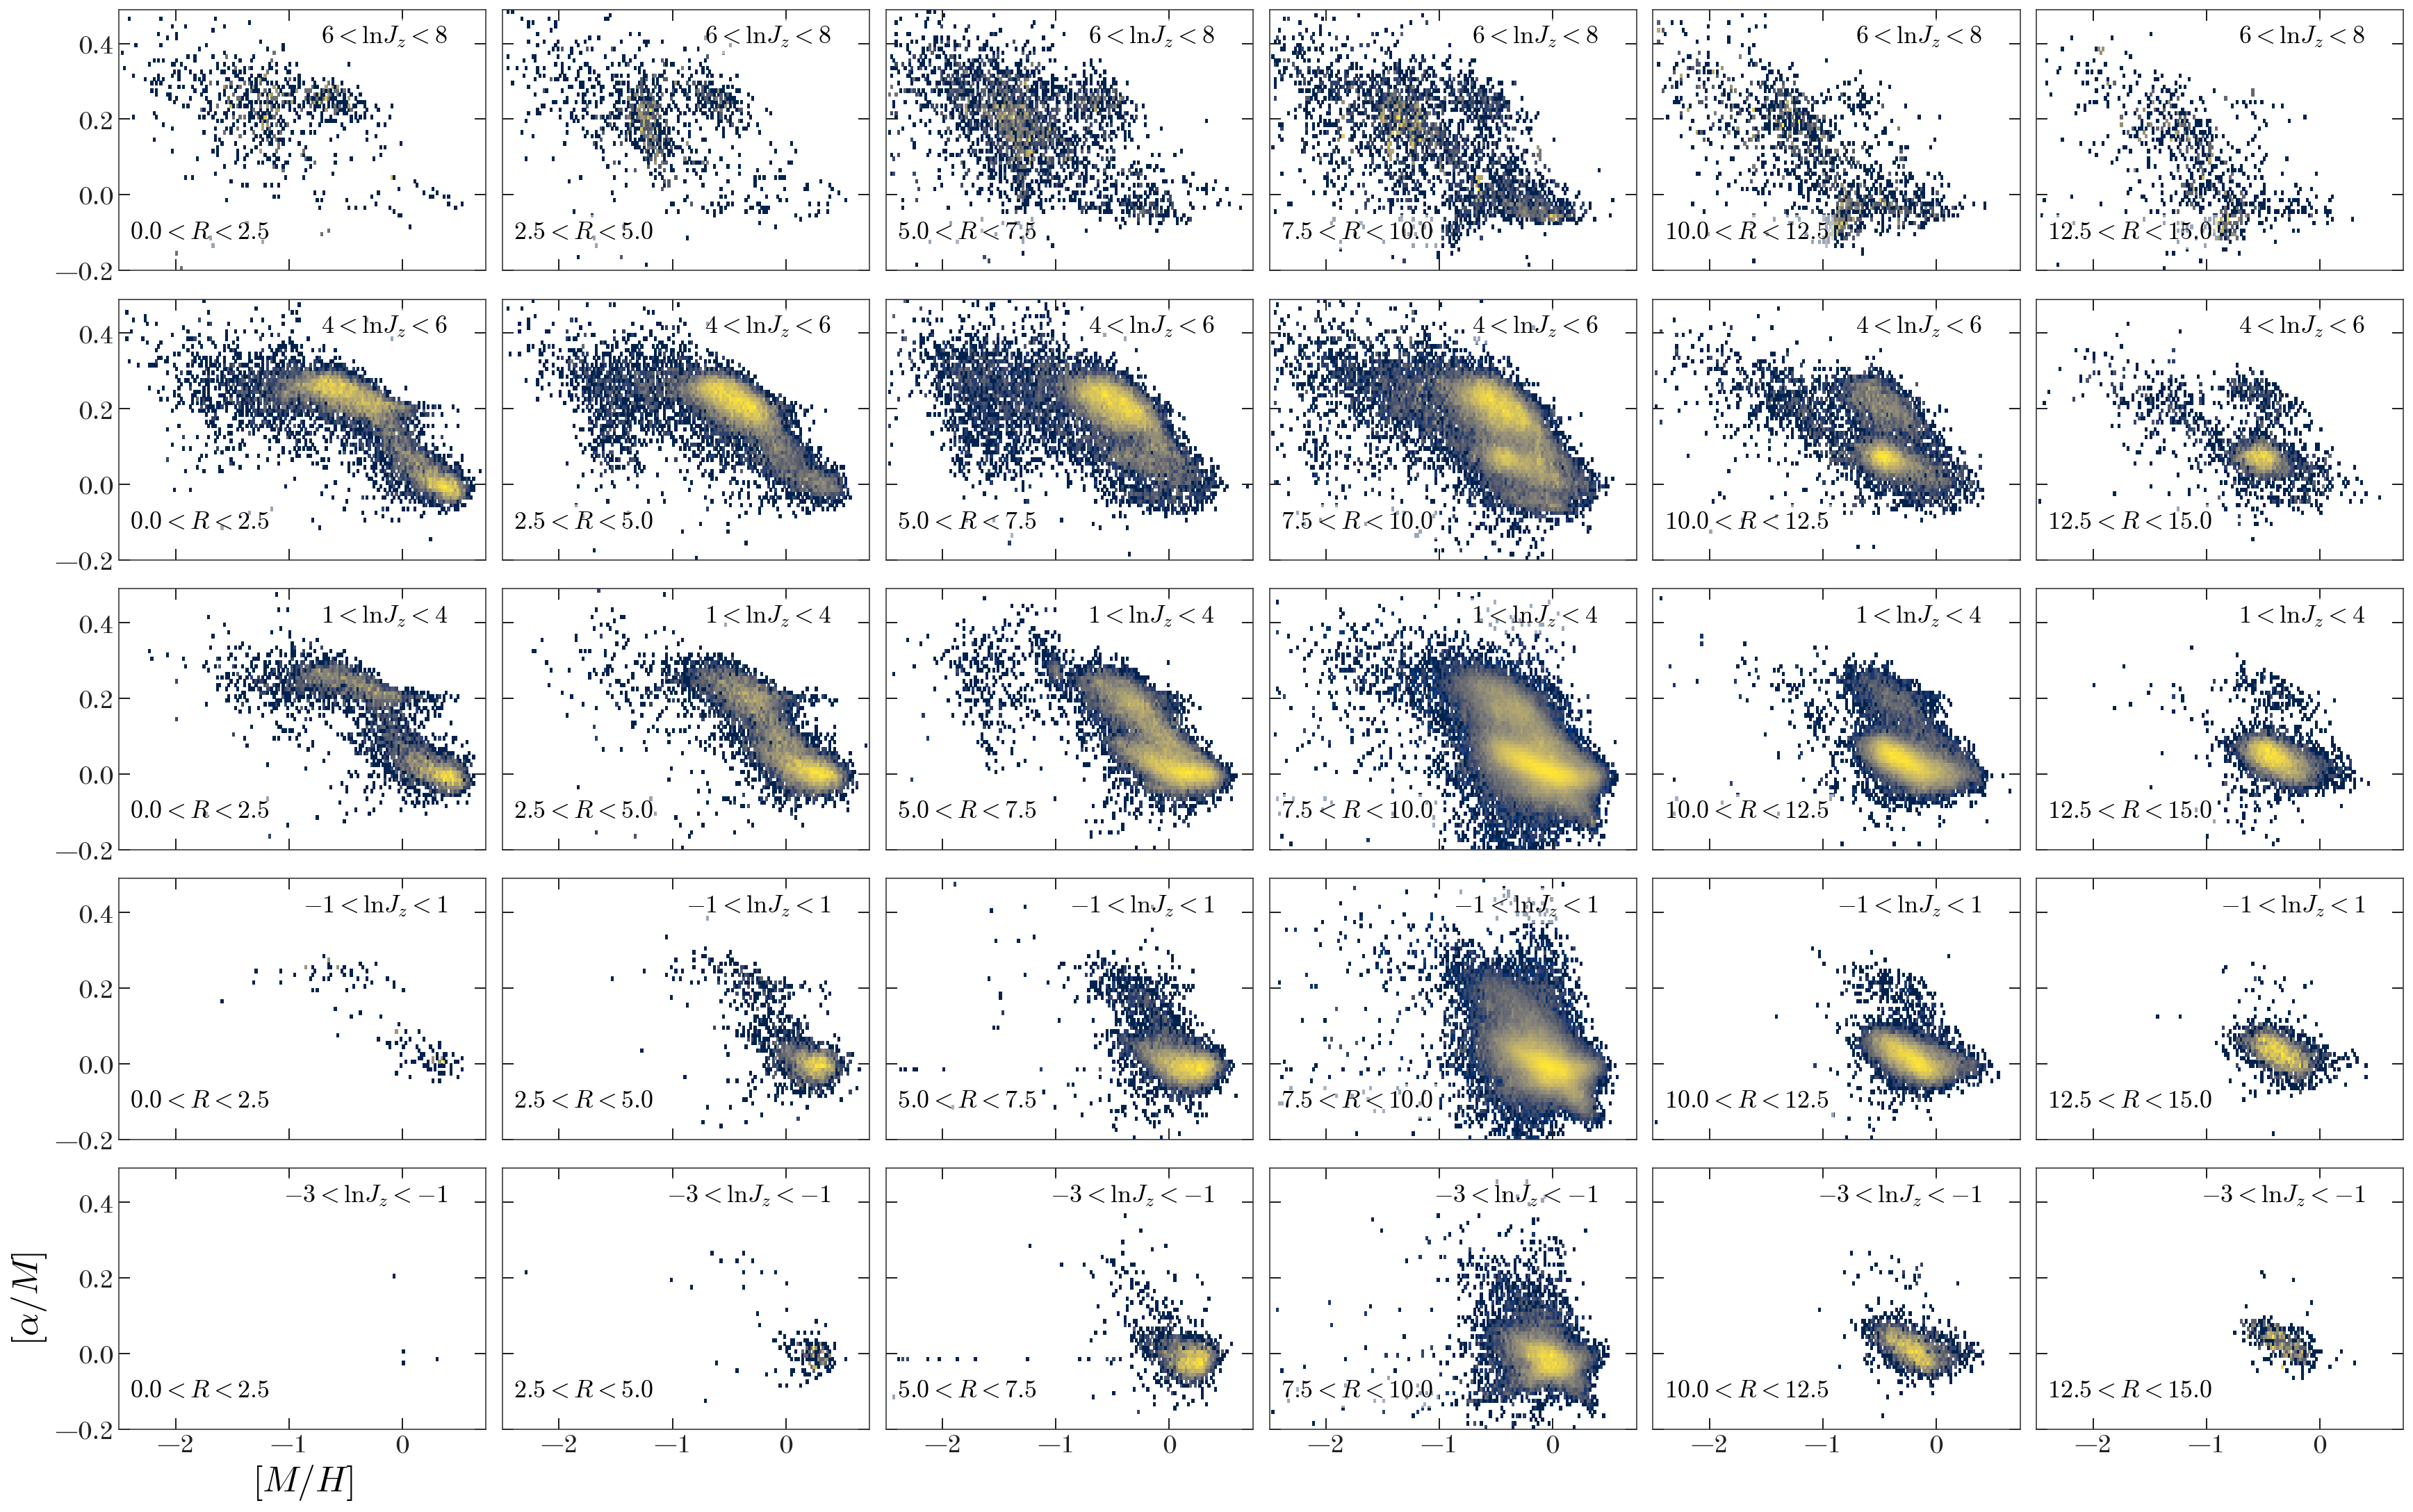

In [139]:
fig, axes = plt.subplots(len(logjz_bins), len(Rbins), 
                         figsize=(4 * len(Rbins), 
                                  4 * len(logjz_bins) * 0.75),
                         sharex=True, sharey=True,
                         constrained_layout=True)

logjz = np.log(t['jz'])

bins = (np.arange(-2.5, 0.75, 0.02),
        np.arange(-0.2, 0.5, 0.01))
for i in range(len(logjz_bins)):
    for j in range(len(Rbins)):
        ax = axes[i, j]
        
        mask = ((logjz > logjz_bins[i][0]) & (logjz < logjz_bins[i][1]) & 
                (t['galr'] > Rbins[j][0]) & (t['galr'] < Rbins[j][1]))
        
        ax.hist2d(t['M_H'][mask], t['ALPHA_M'][mask],
                  bins=bins, norm=mpl.colors.LogNorm(), 
                  cmap='cividis')
        
        l, r = logjz_bins[i]
        ax.text(0.4, 0.45, rf'${l:.1f} < \ln J_z < {r:.1f}$', 
                ha='right', va='top', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))
        
        l, r = Rbins[j]
        ax.text(-2.4, -0.13, rf'${l} < R < {r}$', 
                ha='left', va='bottom', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))

axes[-1, 0].set_ylabel(r'$[\alpha/M]$', fontsize=26)
axes[-1, 0].set_xlabel(r'$[M/H]$', fontsize=26)

fig.set_facecolor('w')

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


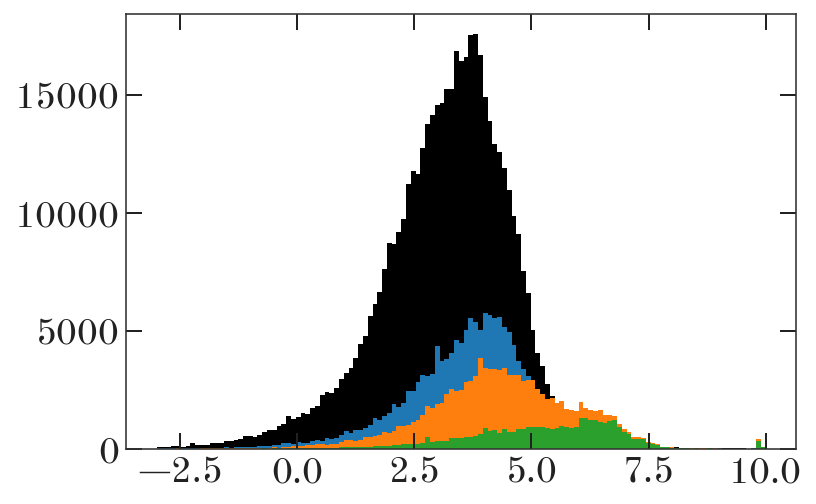

In [19]:
ratio = t['jr']
bins = np.linspace(-3, 10, 128)

x = np.log(ratio)[np.abs(t['galz']) < 0.5]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[(np.abs(t['galz']) > 0.5) & (np.abs(t['galz']) < 1)]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[np.abs(t['galz']) > 1.]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[np.abs(t['galz']) > 2.]
plt.hist(x[np.isfinite(x)], bins=bins);

logjr_bins = np.linspace(-2, 7.5, 6)
logjr_bins = np.stack((logjr_bins[:-1], 
                       logjr_bins[1:])).T[::-1]

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


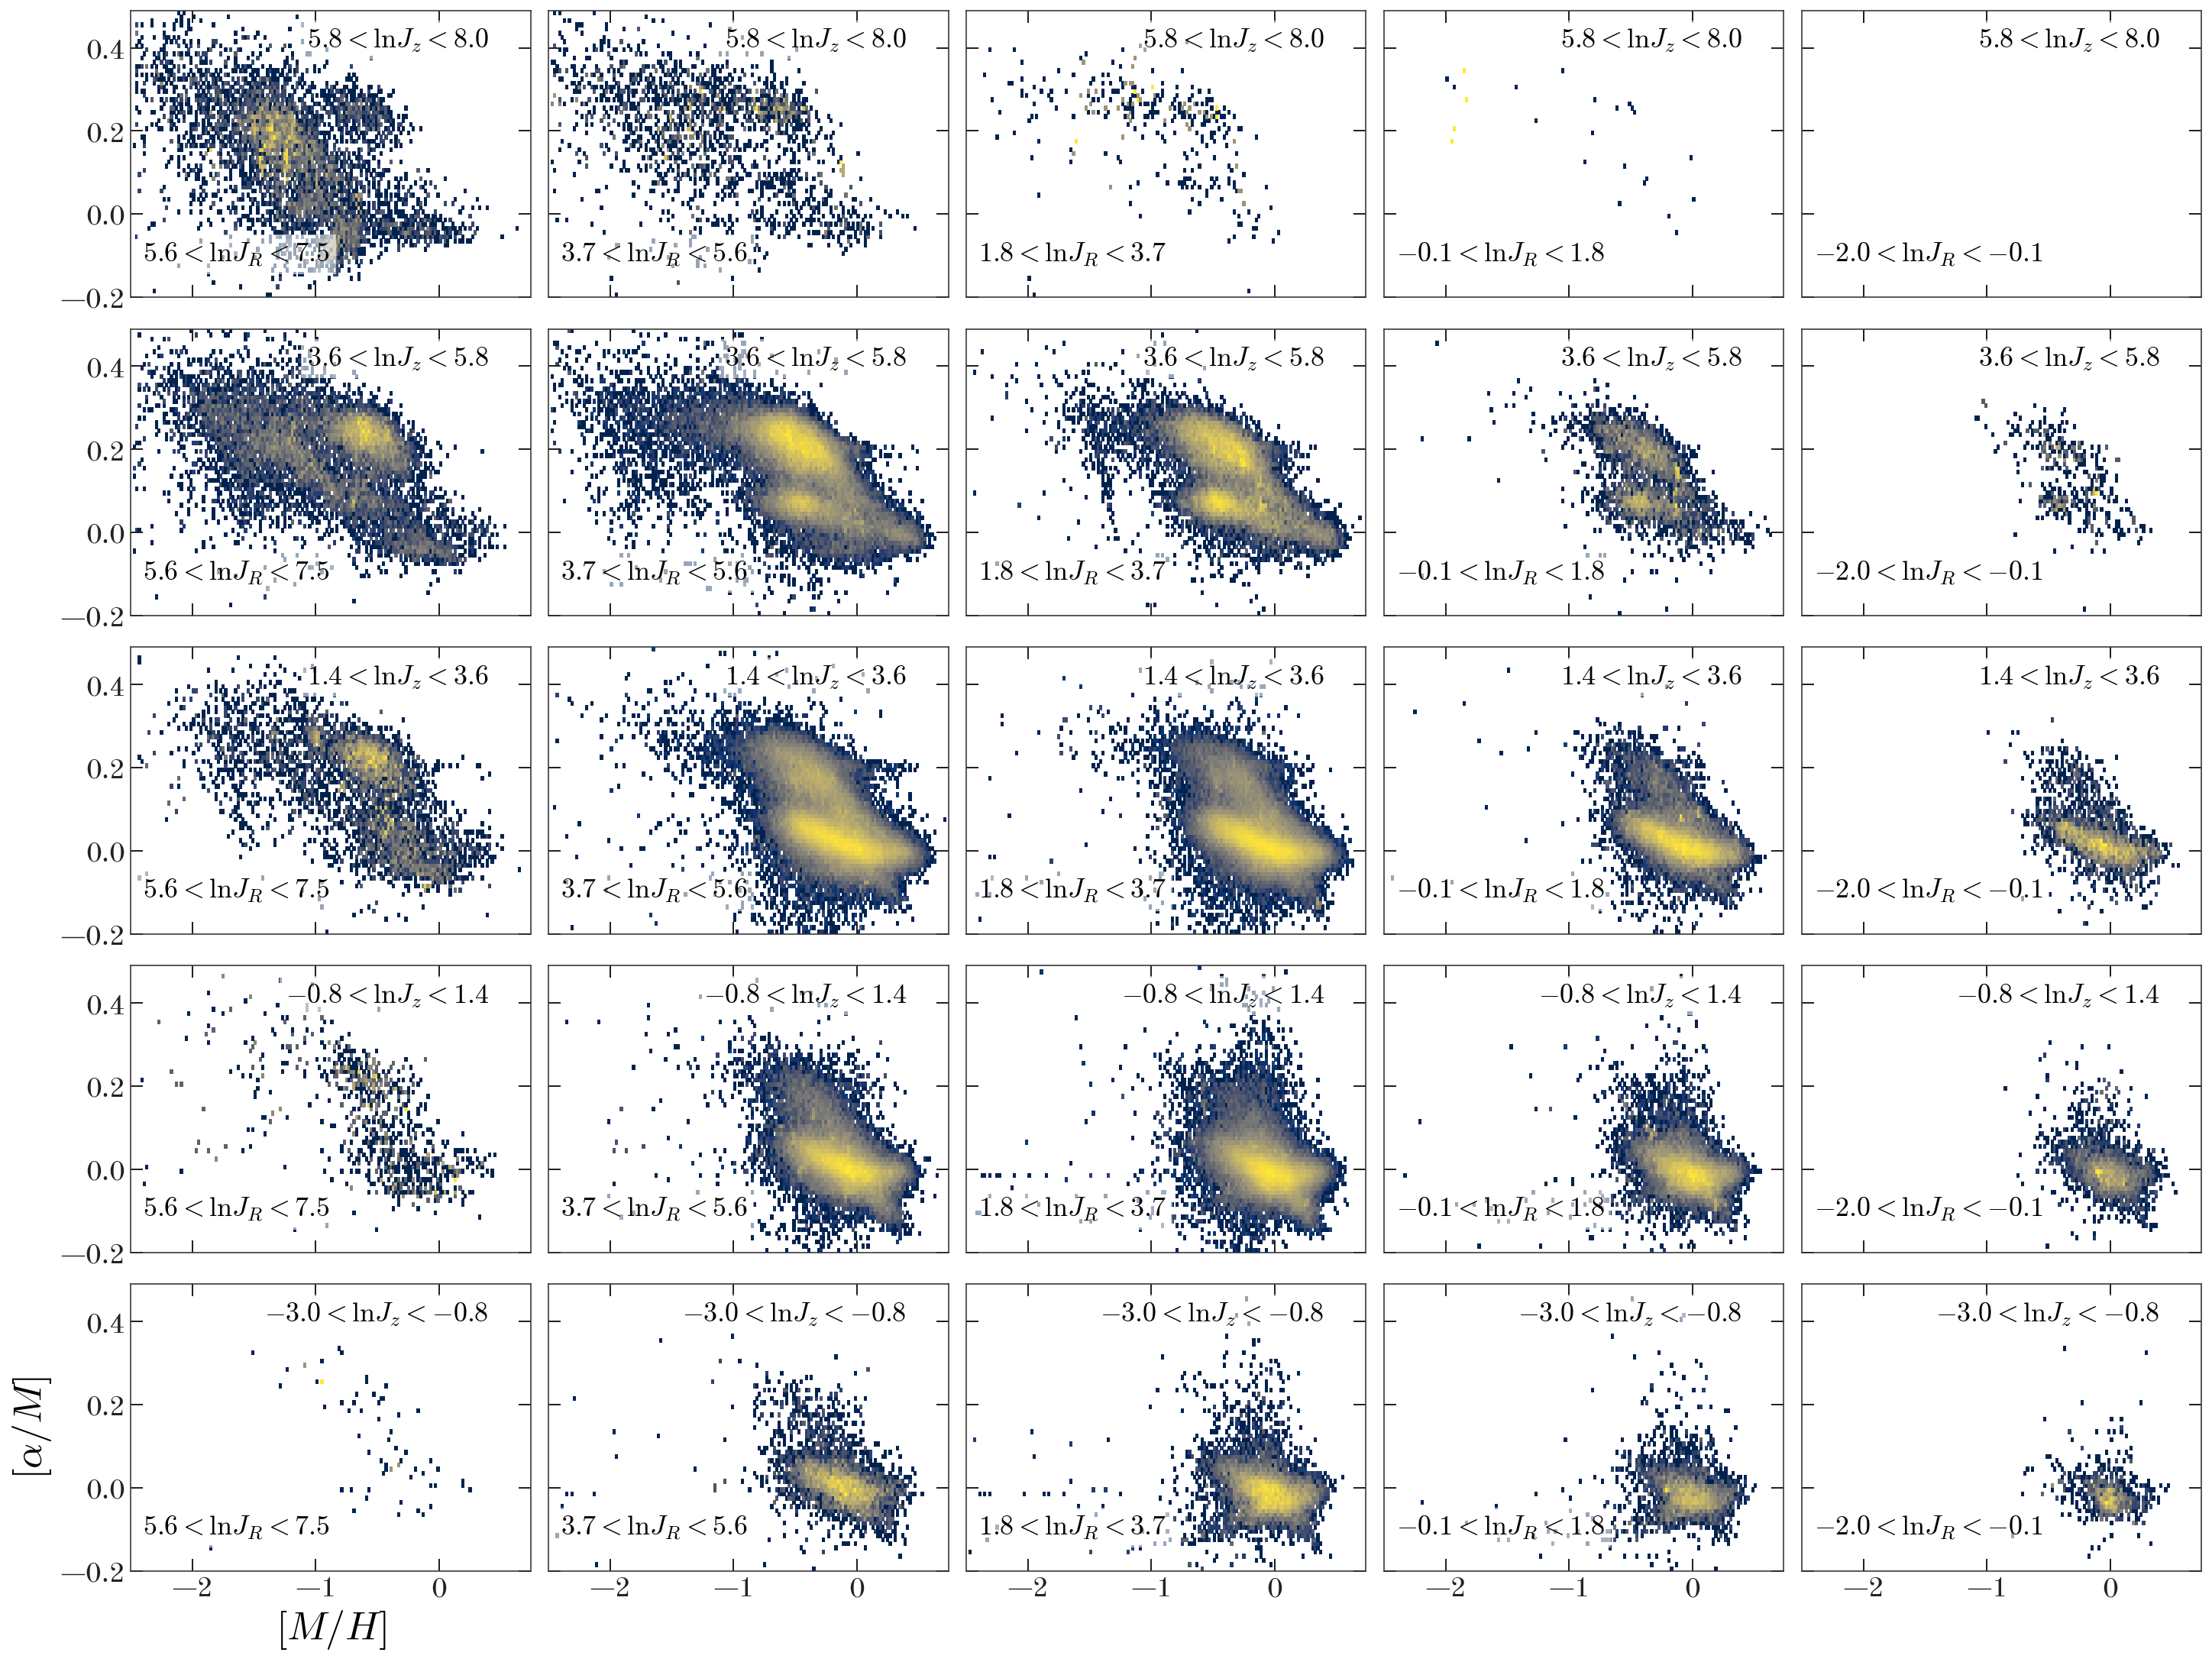

In [20]:
fig, axes = plt.subplots(len(logjz_bins), len(logjr_bins), 
                         figsize=(4 * len(logjr_bins), 
                                  4 * len(logjz_bins) * 0.75),
                         sharex=True, sharey=True,
                         constrained_layout=True)

logjz = np.log(t['jz'])
logjr = np.log(t['jr'])

bins = (np.arange(-2.5, 0.75, 0.02),
        np.arange(-0.2, 0.5, 0.01))
for i in range(len(logjz_bins)):
    for j in range(len(logjr_bins)):
        ax = axes[i, j]
        
        mask = ((logjz > logjz_bins[i][0]) & (logjz < logjz_bins[i][1]) & 
                (logjr > logjr_bins[j][0]) & (logjr < logjr_bins[j][1]))
        
        ax.hist2d(t['M_H'][mask], t['ALPHA_M'][mask],
                  bins=bins, norm=mpl.colors.LogNorm(), 
                  cmap='cividis')
        
        l, r = logjz_bins[i]
        ax.text(0.4, 0.45, rf'${l:.1f} < \ln J_z < {r:.1f}$', 
                ha='right', va='top', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))
        
        l, r = logjr_bins[j]
        ax.text(-2.4, -0.13, rf'${l:.1f} < \ln J_R < {r:.1f}$', 
                ha='left', va='bottom', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))

axes[-1, 0].set_ylabel(r'$[\alpha/M]$', fontsize=26)
axes[-1, 0].set_xlabel(r'$[M/H]$', fontsize=26)

fig.set_facecolor('w')

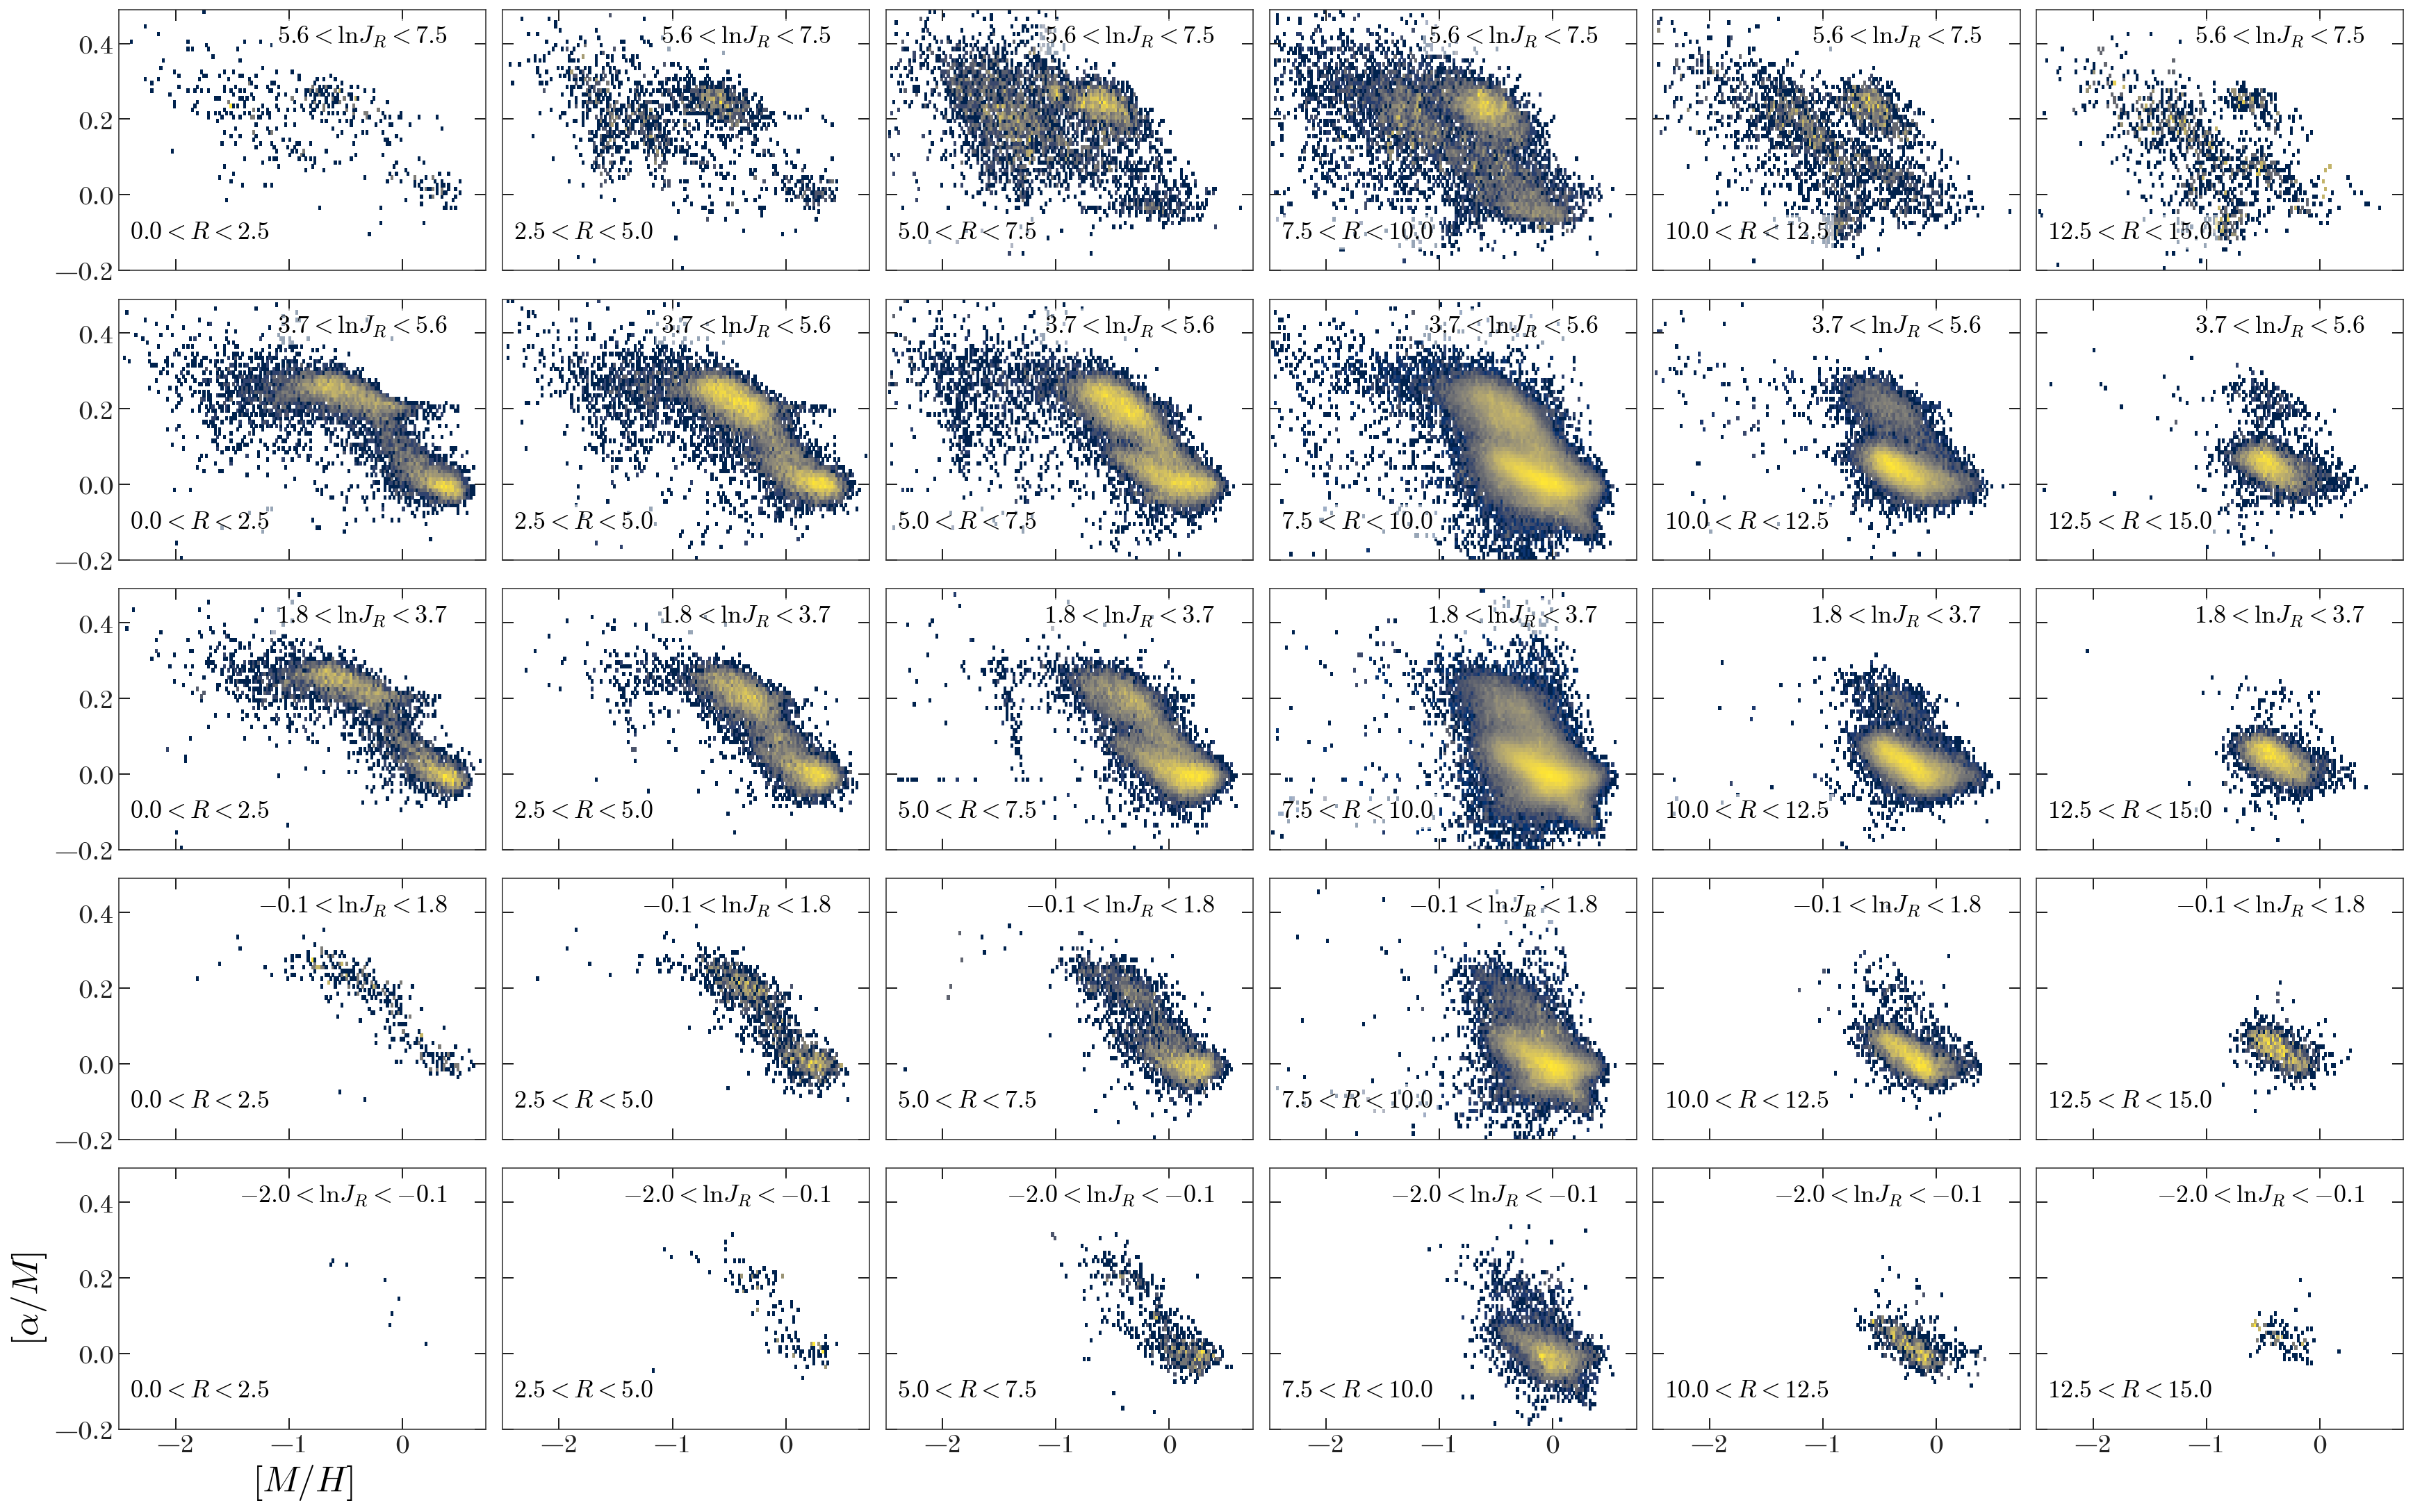

In [21]:
fig, axes = plt.subplots(len(logjr_bins), len(Rbins), 
                         figsize=(4 * len(Rbins), 
                                  4 * len(logjr_bins) * 0.75),
                         sharex=True, sharey=True,
                         constrained_layout=True)

bins = (np.arange(-2.5, 0.75, 0.02),
        np.arange(-0.2, 0.5, 0.01))
for i in range(len(logjr_bins)):
    for j in range(len(Rbins)):
        ax = axes[i, j]
        
        mask = ((logjr > logjr_bins[i][0]) & (logjr < logjr_bins[i][1]) & 
                (t['galr'] > Rbins[j][0]) & (t['galr'] < Rbins[j][1]))
        
        ax.hist2d(t['M_H'][mask], t['ALPHA_M'][mask],
                  bins=bins, norm=mpl.colors.LogNorm(), 
                  cmap='cividis')
        
        l, r = logjr_bins[i]
        ax.text(0.4, 0.45, rf'${l:.1f} < \ln J_R < {r:.1f}$', 
                ha='right', va='top', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))
        
        l, r = Rbins[j]
        ax.text(-2.4, -0.13, rf'${l} < R < {r}$', 
                ha='left', va='bottom', fontsize=18,
                bbox=dict(facecolor='w', alpha=0.6))

axes[-1, 0].set_ylabel(r'$[\alpha/M]$', fontsize=26)
axes[-1, 0].set_xlabel(r'$[M/H]$', fontsize=26)

fig.set_facecolor('w')

Quantiles instead:

In [ ]:
logjr = np.log(t[''])

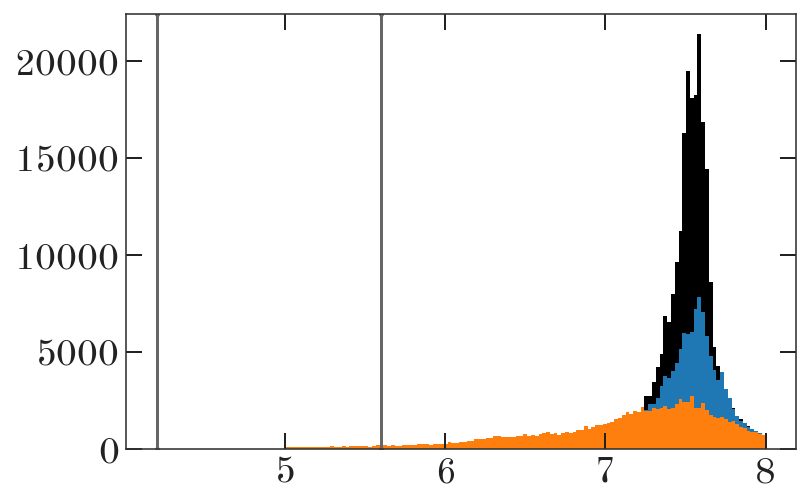

In [97]:
# ratio = np.sqrt(t['Lz']**2 +  t['jr']**2) / t['jz']
# ratio = np.sqrt(t['Lz']**2 +  t['jr']**2)
bins = np.linspace(5, 8, 128)

x = np.log(ratio)[np.abs(t['galz']) < 0.2]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[(np.abs(t['galz']) > 0.5) & (np.abs(t['galz']) < 1)]
plt.hist(x[np.isfinite(x)], bins=bins);

x = np.log(ratio)[np.abs(t['galz']) > 1]
plt.hist(x[np.isfinite(x)], bins=bins);

plt.axvline(4.2)
plt.axvline(5.6)

In [98]:
# logjz_bins = [(-3, 2),
#               (2, 3.5),
#               (3.5, 10)][::-1]
logjz_bins = np.arange(-3, 8+1e-3, 2)
logjz_bins = np.stack((logjz_bins[:-1], logjz_bins[1:])).T[::-1]

# logjphijr_bins = np.arange(-1, 6+1e-3, 2)
# logjphijr_bins = np.stack((logjphijr_bins[:-1], logjphijr_bins[1:])).T
logjphijr_bins = np.arange(5, 9+1e-3, 1)
logjphijr_bins = np.stack((logjphijr_bins[:-1], logjphijr_bins[1:])).T

len(logjz_bins), len(logjphijr_bins)

(5, 4)

/Users/apricewhelan/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


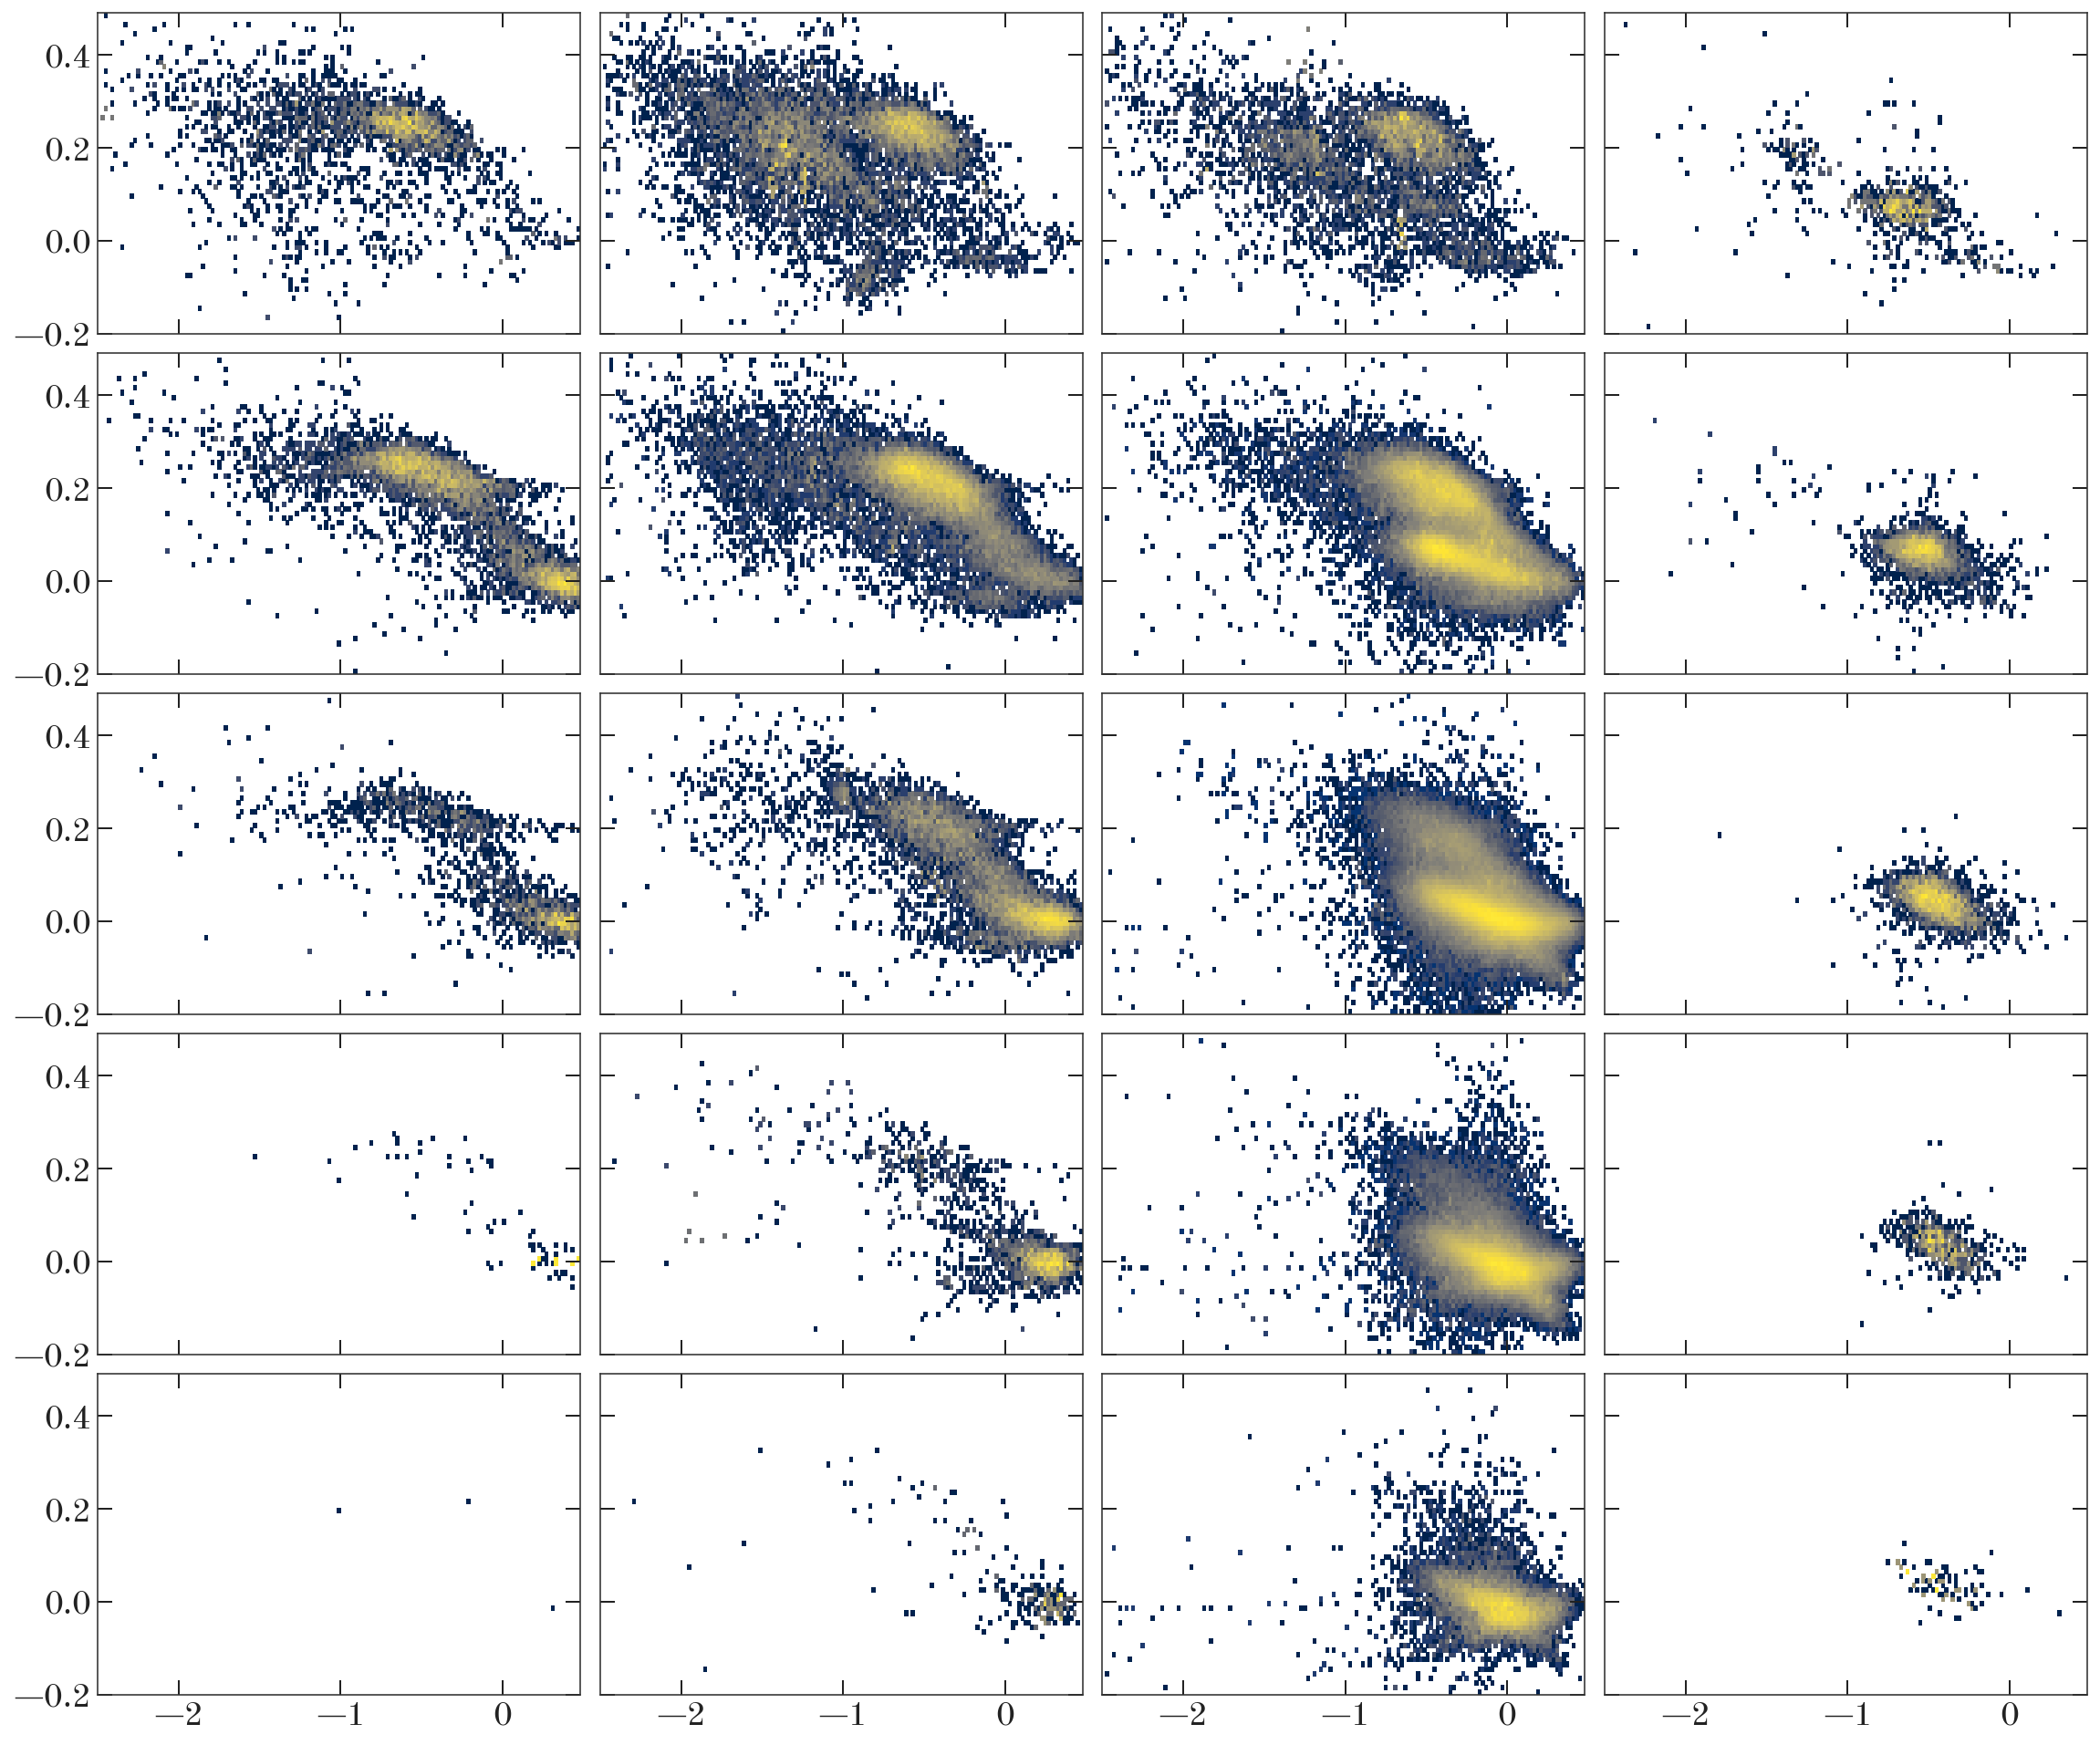

In [99]:
fig, axes = plt.subplots(len(logjz_bins), len(logjphijr_bins), 
                         figsize=(4 * len(logjphijr_bins), 
                                  4 * len(logjz_bins) * 0.67),
                         sharex=True, sharey=True)

logjz = np.log(t['jz'])
# logjphijr = np.log(t['Lz'] / t['jz'])
# logjphijr = 0.5 * np.log((t['Lz']**2 +  t['jr']**2) / t['jz'])
logjphijr = 0.5 * np.log((t['Lz']**2 +  t['jr']**2))

bins = (np.arange(-2.5, 0.5, 0.02),
        np.arange(-0.2, 0.5, 0.01))
for i in range(len(logjz_bins)):
    for j in range(len(logjphijr_bins)):
        ax = axes[i, j]
        
        mask = ((logjz > logjz_bins[i][0]) & (logjz < logjz_bins[i][1]) & 
                (logjphijr > logjphijr_bins[j][0]) & (logjphijr < logjphijr_bins[j][1]))
        
        ax.hist2d(t['M_H'][mask], t['ALPHA_M'][mask],
                  bins=bins, norm=mpl.colors.LogNorm(), 
                  cmap='cividis')
        
fig.tight_layout()